<a href="https://colab.research.google.com/github/vanikanjirangat/Tokenizer_Fairness_Dialect/blob/main/Intrinsic_Analysis_FLORES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# IP_TP**


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

Mounted at /content/gdrive


In [ ]:
import os
import pandas as pd
#root_dir = "/content/gdrive/My Drive/Colab Notebooks/INCdid_Project/"

In [ ]:
path="/merged_ip_tp_metrics.csv" # the path to metrics computed. This could be found inside the correlation_scripts/

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(path)

In [ ]:
df

,language,flores_code,ip_flores,model,ip_mean,ip_std,ip_median,tp
0,Standard Arabic,arb_Arab,ar,Phi-Mini,0.653324,0.125700,0.653206,3.413040
1,Assamese,asm_Beng,as,Phi-Mini,0.236400,0.055289,0.230919,6.112221
2,North Azerbaijani,azj_Latn,aj,Phi-Mini,0.287282,0.068298,0.280701,2.601606
3,Bengali,ben_Beng,bn,Phi-Mini,0.333835,0.078049,0.327429,5.349285
4,Bulgarian,bul_Cyrl,bg,Phi-Mini,0.360158,0.080774,0.353796,1.774338
...,...,...,...,...,...,...,...,...
319,Ukrainian,ukr_Cyrl,uk,Falcon,0.390706,0.085632,0.389015,4.982266
320,Urdu,urd_Arab,ur,Falcon,0.323002,0.073532,0.317548,5.878330
321,Vietnamese,vie_Latn,vi,Falcon,0.452884,0.098867,0.445434,3.646328
322,Chinese (Simplified),zho_Hans,zh,Falcon,0.785134,0.166682,0.772078,1.889159


In [ ]:
df = df.drop_duplicates()

In [ ]:
len(df['language'].values)

324

In [ ]:
print(list(df['language'].unique()) )

['Standard Arabic', 'Assamese', 'North Azerbaijani', 'Bengali', 'Bulgarian', 'Catalan', 'Czech', 'Central Kurdish', 'Danish', 'German', 'Greek', 'Estonian', 'Basque', 'Finnish', 'French', 'Gujarati', 'Haitian Creole', 'Hebrew', 'Hindi', 'Croatian', 'Hungarian', 'Indonesian', 'Italian', 'Japanese', 'Kannada', 'Georgian', 'Korean', 'Ligurian', 'Standard Latvian', 'Malayalam', 'Marathi', 'Burmese', 'Dutch', 'Norwegian Bokmål', 'Nepali', 'Northern Sotho', 'Odia', 'Eastern Panjabi', 'Portuguese', 'Ayacucho Quechua', 'Romanian', 'Russian', 'Spanish', 'Serbian', 'Swahili', 'Tamil', 'Telugu', 'Thai', 'Turkish', 'Ukrainian', 'Urdu', 'Vietnamese', 'Chinese (Simplified)', 'Standard Malay']


In [ ]:
len(list(df['language'].unique()) )

54

In [ ]:
len(list(df['flores_code'].unique()) )

54

define the resource and script categories

In [ ]:
latin_scripts = {
    'Catalan', 'Czech', 'Danish', 'German', 'English', 'Estonian', 'Basque',
    'Finnish', 'French', 'Haitian Creole', 'Croatian', 'Hungarian', 'Indonesian',
    'Italian', 'Ligurian', 'Standard Latvian', 'Dutch', 'Norwegian Bokmål',
    'Portuguese', 'Romanian', 'Spanish', 'Swahili', 'Turkish', 'Ayacucho Quechua',
    'Standard Malay'
}

# Define resource levels
high_resource = {
    'Standard Arabic', 'French', 'Spanish', 'Russian', 'Hindi',
    'German', 'Chinese (Simplified)', 'English'
}
middle_resource = {
    'Japanese', 'Korean', 'Turkish', 'Vietnamese', 'Urdu', 'Portuguese'
}

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch

# ---- Language sets ----
latin_scripts = {
    'Catalan', 'Czech', 'Danish', 'German', 'English', 'Estonian', 'Basque',
    'Finnish', 'French', 'Haitian Creole', 'Croatian', 'Hungarian', 'Indonesian',
    'Italian', 'Ligurian', 'Standard Latvian', 'Dutch', 'Norwegian Bokmål',
    'Portuguese', 'Romanian', 'Spanish', 'Swahili', 'Turkish', 'Ayacucho Quechua',
    'Standard Malay'
}

# Define resource levels
high_resource = {
    'Standard Arabic', 'French', 'Spanish', 'Russian', 'Hindi',
    'German', 'Chinese (Simplified)', 'English'
}
middle_resource = {
    'Italian','Romanian','Dutch','Japanese', 'Korean', 'Turkish', 'Vietnamese', 'Urdu', 'Portuguese'
}
# All others will be considered low-resource

# ---- Categorize each language ----
def classify(lang):
    script = 'Latin' if lang in latin_scripts else 'Non-Latin'
    if lang in high_resource:
        resource = 'High'
    elif lang in middle_resource:
        resource = 'Middle'
    else:
        resource = 'Low'
    return f'{script}-{resource}'

df['category'] = df['language'].apply(classify)

# ---- Define ordering ----
cat_order = [
    'Latin-High', 'Latin-Middle', 'Latin-Low',
    'Non-Latin-High', 'Non-Latin-Middle', 'Non-Latin-Low'
]
df['category'] = pd.Categorical(df['category'], categories=cat_order, ordered=True)
df = df.sort_values(by=['category', 'language']).reset_index(drop=True)


In [ ]:
df

,language,flores_code,ip_flores,model,ip_mean,ip_std,ip_median,tp,category
0,French,fra_Latn,fr,Phi-Mini,0.876116,0.138892,0.870626,1.473165,Latin-High
1,French,fra_Latn,fr,Gemma,0.798801,0.119817,0.799994,1.363444,Latin-High
2,French,fra_Latn,fr,Llama3,0.809395,0.110157,0.807328,1.603796,Latin-High
3,French,fra_Latn,fr,Mistral,0.775778,0.115656,0.772022,1.599973,Latin-High
4,French,fra_Latn,fr,SILMA,0.908393,0.141644,0.896298,1.363444,Latin-High
...,...,...,...,...,...,...,...,...,...
319,Ukrainian,ukr_Cyrl,uk,Gemma,0.720969,0.118412,0.716693,1.658593,Non-Latin-Low
320,Ukrainian,ukr_Cyrl,uk,Llama3,0.669310,0.108562,0.665383,1.640462,Non-Latin-Low
321,Ukrainian,ukr_Cyrl,uk,Mistral,0.681268,0.113584,0.677706,1.936562,Non-Latin-Low
322,Ukrainian,ukr_Cyrl,uk,SILMA,0.769793,0.130450,0.765068,1.658593,Non-Latin-Low


In [ ]:
import pandas as pd

# Assuming df is your DataFrame and includes 'language', 'flores_code', and 'category'

# Group by category
category_groups = df.groupby('category')

# For each category, print languages with flores_code in brackets
for category, group in category_groups:
    print(f"### {category}")
    formatted = [f"{lang} ({code})" for lang, code in zip(group['language'], group['flores_code'])]
    formatted=list(set(formatted))
    print(", ".join(formatted))
    #print()


### Latin-High
German (deu_Latn), French (fra_Latn), Spanish (spa_Latn)
### Latin-Middle
Italian (ita_Latn), Turkish (tur_Latn), Dutch (nld_Latn), Portuguese (por_Latn), Romanian (ron_Latn)
### Latin-Low
Indonesian (ind_Latn), Finnish (fin_Latn), Ayacucho Quechua (quy_Latn), Basque (eus_Latn), Hungarian (hun_Latn), Haitian Creole (hat_Latn), Danish (dan_Latn), Czech (ces_Latn), Estonian (est_Latn), Croatian (hrv_Latn), Standard Latvian (lvs_Latn), Ligurian (lij_Latn), Catalan (cat_Latn), Norwegian Bokmål (nob_Latn), Standard Malay (zsm_Latn), Swahili (swh_Latn)
### Non-Latin-High
Standard Arabic (arb_Arab), Hindi (hin_Deva), Russian (rus_Cyrl), Chinese (Simplified) (zho_Hans)
### Non-Latin-Middle
Urdu (urd_Arab), Vietnamese (vie_Latn), Korean (kor_Hang), Japanese (jpn_Jpan)
### Non-Latin-Low
Nepali (npi_Deva), Odia (ory_Orya), Northern Sotho (nso_Latn), Ukrainian (ukr_Cyrl), Bengali (ben_Beng), Serbian (srp_Cyrl), North Azerbaijani (azj_Latn), Eastern Panjabi (pan_Guru), Thai (tha_Thai

/tmp/ipython-input-45879688.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_groups = df.groupby('category')


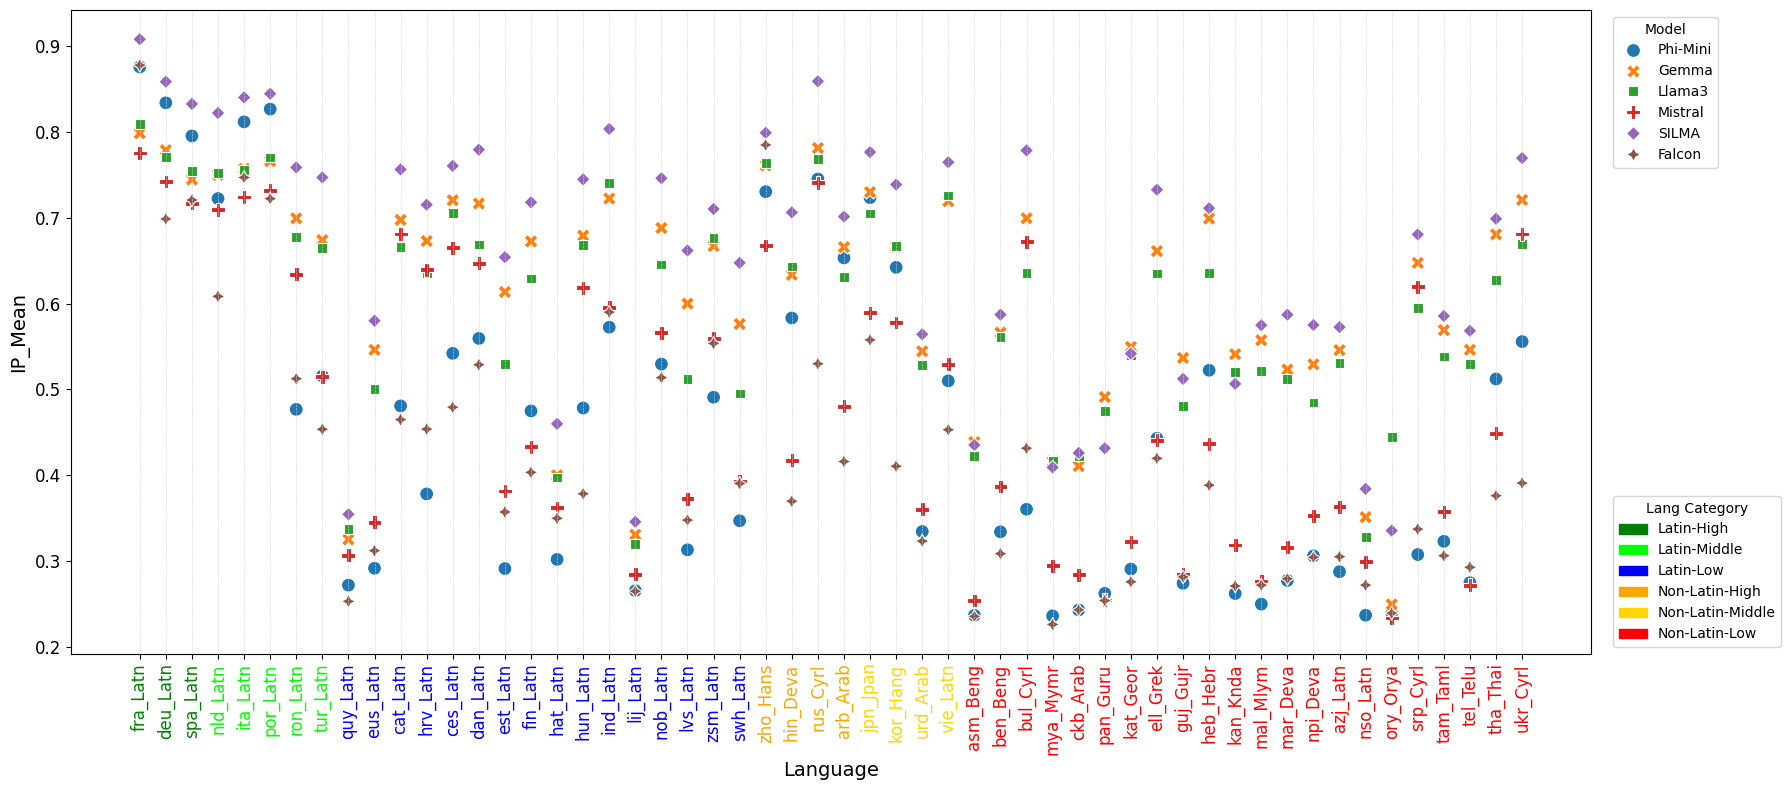

In [ ]:

# ---- Mapping language → category ----
language_to_category = dict(zip(df['flores_code'], df['category']))

# ---- Color mapping for categories ----
category_colors = {
    'Latin-High': 'green',
    'Latin-Middle': 'lime',
    'Latin-Low': 'blue',
    'Non-Latin-High': 'orange',
    'Non-Latin-Middle': 'gold',
    'Non-Latin-Low': 'red'
}

# ---- Plot ----
plt.figure(figsize=(18, 8))
ax = sns.scatterplot(data=df, x='language', y='ip_mean', hue='model', style='model', s=100)

# Add vertical lines
for i, lang in enumerate(df['flores_code'].unique()):
    plt.axvline(x=i, color='lightgray', linestyle='--', linewidth=0.4)

# Set x-ticks and rotate
xticks = list(df['flores_code'].unique())
ax.set_xticks(range(len(xticks)))
ax.set_xticklabels(xticks, rotation=90,fontsize=12)

# Color tick labels by category
for tick_label in ax.get_xticklabels():
    lang = tick_label.get_text()
    cat = language_to_category.get(lang)
    if cat:
        tick_label.set_color(category_colors[cat])

# ---- Add category legend manually ----
handles, labels = ax.get_legend_handles_labels()
category_patches = [
    Patch(color=color, label=label) for label, color in category_colors.items()
]

# Position both legends
legend1 = ax.legend(handles=handles, title='Model', loc='upper left', bbox_to_anchor=(1.01, 1))
legend2 = ax.legend(handles=category_patches, title='Lang Category', loc='lower left', bbox_to_anchor=(1.01, 0))
ax.add_artist(legend1)  # Ensure model legend stays

# Final touches
#plt.title("Information Parity (IP Mean) across Languages by Model")
plt.ylabel("IP_Mean",fontsize=14)
plt.xlabel("Language",fontsize=14)
ax.tick_params(axis='y', labelsize=12)  # y-axis ticks font size
plt.tight_layout()
plt.show()


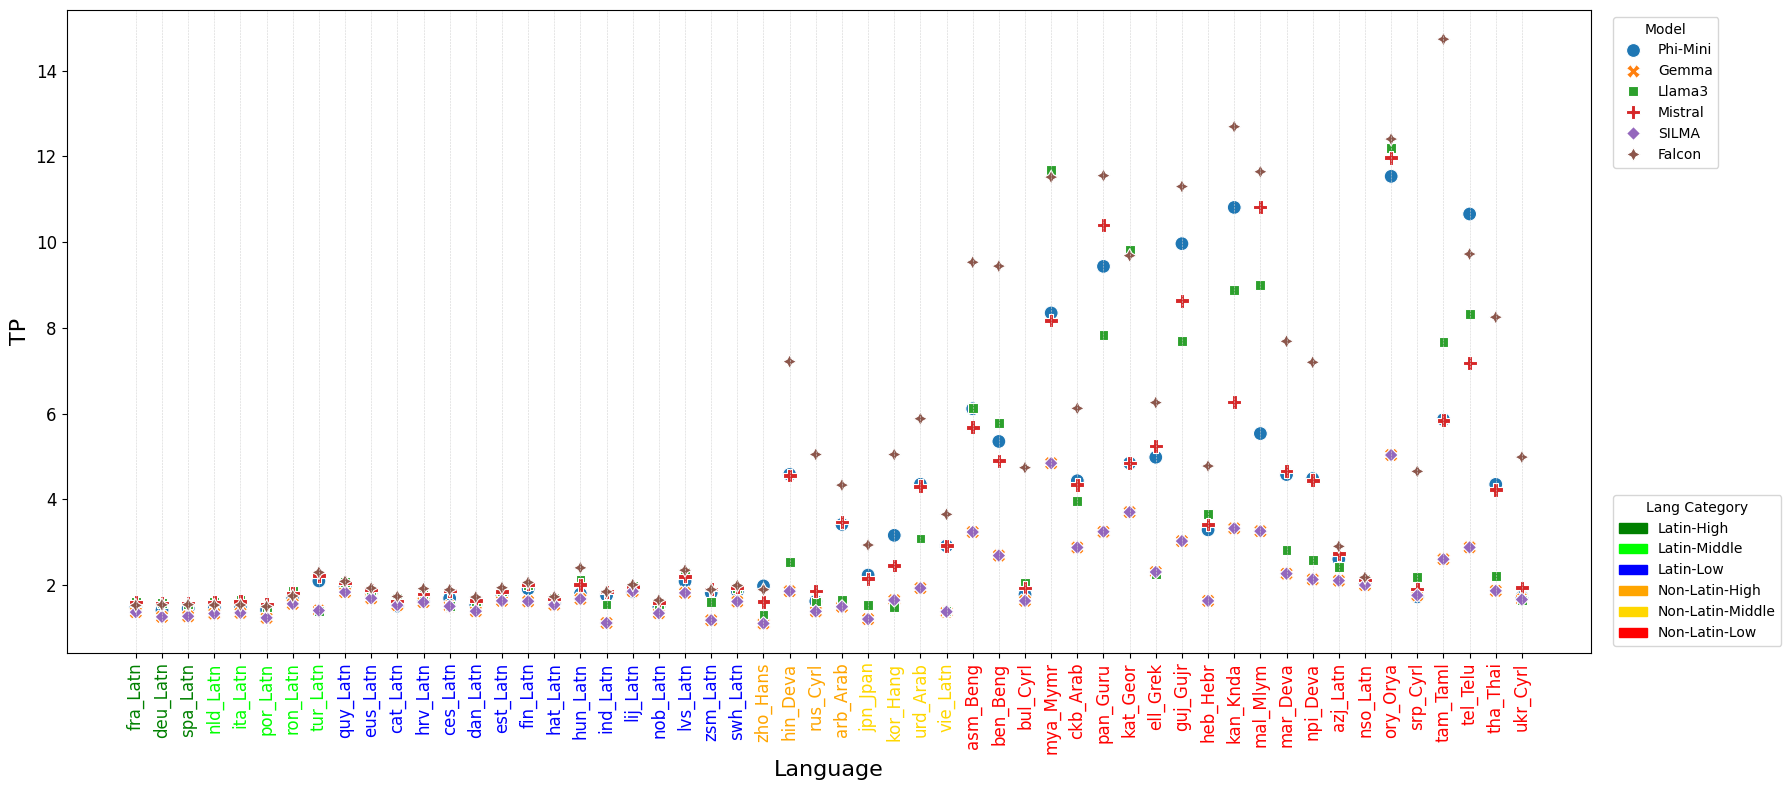

In [ ]:
# ---- Mapping language → category ----
language_to_category = dict(zip(df['flores_code'], df['category']))

# ---- Color mapping for categories ----
category_colors = {
    'Latin-High': 'green',
    'Latin-Middle': 'lime',
    'Latin-Low': 'blue',
    'Non-Latin-High': 'orange',
    'Non-Latin-Middle': 'gold',
    'Non-Latin-Low': 'red'
}

# ---- Plot ----
plt.figure(figsize=(18, 8))
ax = sns.scatterplot(data=df, x='language', y='tp', hue='model', style='model', s=100)

# Add vertical lines
for i, lang in enumerate(df['flores_code'].unique()):
    plt.axvline(x=i, color='lightgray', linestyle='--', linewidth=0.4)

# Set x-ticks and rotate
xticks = list(df['flores_code'].unique())
ax.set_xticks(range(len(xticks)))
ax.set_xticklabels(xticks, rotation=90,fontsize=12)

# Color tick labels by category
for tick_label in ax.get_xticklabels():
    lang = tick_label.get_text()
    cat = language_to_category.get(lang)
    if cat:
        tick_label.set_color(category_colors[cat])

# ---- Add category legend manually ----
handles, labels = ax.get_legend_handles_labels()
category_patches = [
    Patch(color=color, label=label) for label, color in category_colors.items()
]

# Position both legends
legend1 = ax.legend(handles=handles, title='Model', loc='upper left', bbox_to_anchor=(1.01, 1))
legend2 = ax.legend(handles=category_patches, title='Lang Category', loc='lower left', bbox_to_anchor=(1.01, 0))
ax.add_artist(legend1)  # Ensure model legend stays

# Final touches
#plt.title("Tokenization Parity (TP) across Languages by Model")
plt.ylabel("TP",fontsize=16)
plt.xlabel("Language",fontsize=16)
ax.tick_params(axis='y', labelsize=12)  # y-axis ticks font size
plt.tight_layout()
plt.show()

In [ ]:
import json
import pandas as pd

# Load JSON (replace 'path_to_json_file.json' with your file path)
with open(root_dir+'token_parity_scores.json', 'r') as f:
    tp_data = json.load(f)
lang_to_flores = dict(zip(df['language'], df['flores_code']))

In [ ]:
df_tp["model"] = df_tp["model"].replace({
    "IndicBERT": "IndicTransformers",
    "GermanBERT": "SwissBERT"
})

/tmp/ipython-input-704869033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tp["model"] = df_tp["model"].replace({


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch

# ---- Language sets ----
latin_scripts = {
    'Catalan', 'Czech', 'Danish', 'German', 'English', 'Estonian', 'Basque',
    'Finnish', 'French', 'Haitian Creole', 'Croatian', 'Hungarian', 'Indonesian',
    'Italian', 'Ligurian', 'Standard Latvian', 'Dutch', 'Norwegian Bokmål',
    'Portuguese', 'Romanian', 'Spanish', 'Swahili', 'Turkish', 'Ayacucho Quechua',
    'Standard Malay'
}

# Define resource levels
high_resource = {
    'Standard Arabic', 'French', 'Spanish', 'Russian', 'Hindi',
    'German', 'Chinese (Simplified)', 'English'
}
middle_resource = {
    'Italian','Romanian','Dutch','Japanese', 'Korean', 'Turkish', 'Vietnamese', 'Urdu', 'Portuguese'
}
# ---- Categorize each language ----
def classify(lang):
    script = 'Latin' if lang in latin_scripts else 'Non-Latin'
    if lang in high_resource:
        resource = 'High'
    elif lang in middle_resource:
        resource = 'Middle'
    else:
        resource = 'Low'
    return f'{script}-{resource}'

df_tp['category'] = df_tp['language'].apply(classify)

# ---- Define ordering ----
cat_order = [
    'Latin-High', 'Latin-Middle', 'Latin-Low',
    'Non-Latin-High', 'Non-Latin-Middle', 'Non-Latin-Low'
]
df_tp['category'] = pd.Categorical(df_tp['category'], categories=cat_order, ordered=True)
df_tp = df_tp.sort_values(by=['category', 'language']).reset_index(drop=True)

/tmp/ipython-input-2918492499.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tp['category'] = df_tp['language'].apply(classify)
/tmp/ipython-input-2918492499.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tp['category'] = pd.Categorical(df_tp['category'], categories=cat_order, ordered=True)


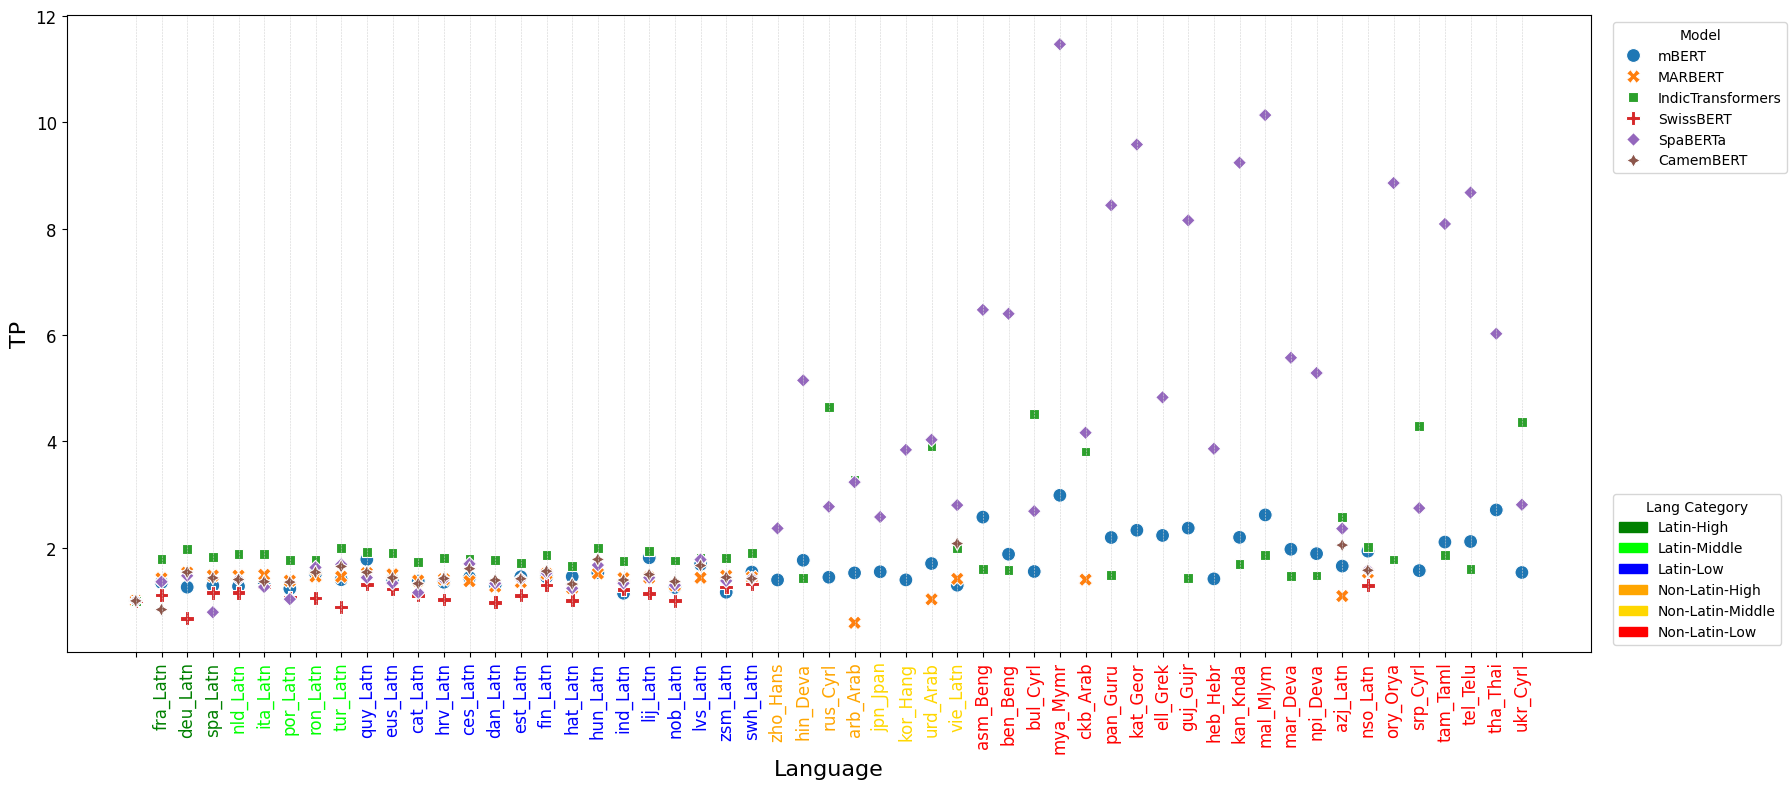

In [ ]:
# ---- Mapping language → category ----
language_to_category = dict(zip(df_tp['flores_code'], df_tp['category']))

# ---- Color mapping for categories ----
category_colors = {
    'Latin-High': 'green',
    'Latin-Middle': 'lime',
    'Latin-Low': 'blue',
    'Non-Latin-High': 'orange',
    'Non-Latin-Middle': 'gold',
    'Non-Latin-Low': 'red'
}

# ---- Plot ----
plt.figure(figsize=(18,8))
ax = sns.scatterplot(data=df_tp, x='language', y='tp', hue='model', style='model', s=100)

# Add vertical lines
for i, lang in enumerate(df_tp['flores_code'].unique()):
    plt.axvline(x=i, color='lightgray', linestyle='--', linewidth=0.4)

# Set x-ticks and rotate
xticks = list(df_tp['flores_code'].unique())
ax.set_xticks(range(len(xticks)))
ax.set_xticklabels(xticks, rotation=90,fontsize=12)

# Color tick labels by category
for tick_label in ax.get_xticklabels():
    lang = tick_label.get_text()
    cat = language_to_category.get(lang)
    if cat:
        tick_label.set_color(category_colors[cat])

# ---- Add category legend manually ----
handles, labels = ax.get_legend_handles_labels()
category_patches = [
    Patch(color=color, label=label) for label, color in category_colors.items()
]

# Position both legends
legend1 = ax.legend(handles=handles, title='Model', loc='upper left', bbox_to_anchor=(1.01, 1))
legend2 = ax.legend(handles=category_patches, title='Lang Category', loc='lower left', bbox_to_anchor=(1.01, 0))
ax.add_artist(legend1)  # Ensure model legend stays

# Final touches
#plt.title("Tokenization Parity (TP) across Languages by Encoder variants")
plt.ylabel("TP",fontsize=16)
plt.xlabel("Language",fontsize=16)
ax.tick_params(axis='y', labelsize=12)
plt.tight_layout()
plt.show()

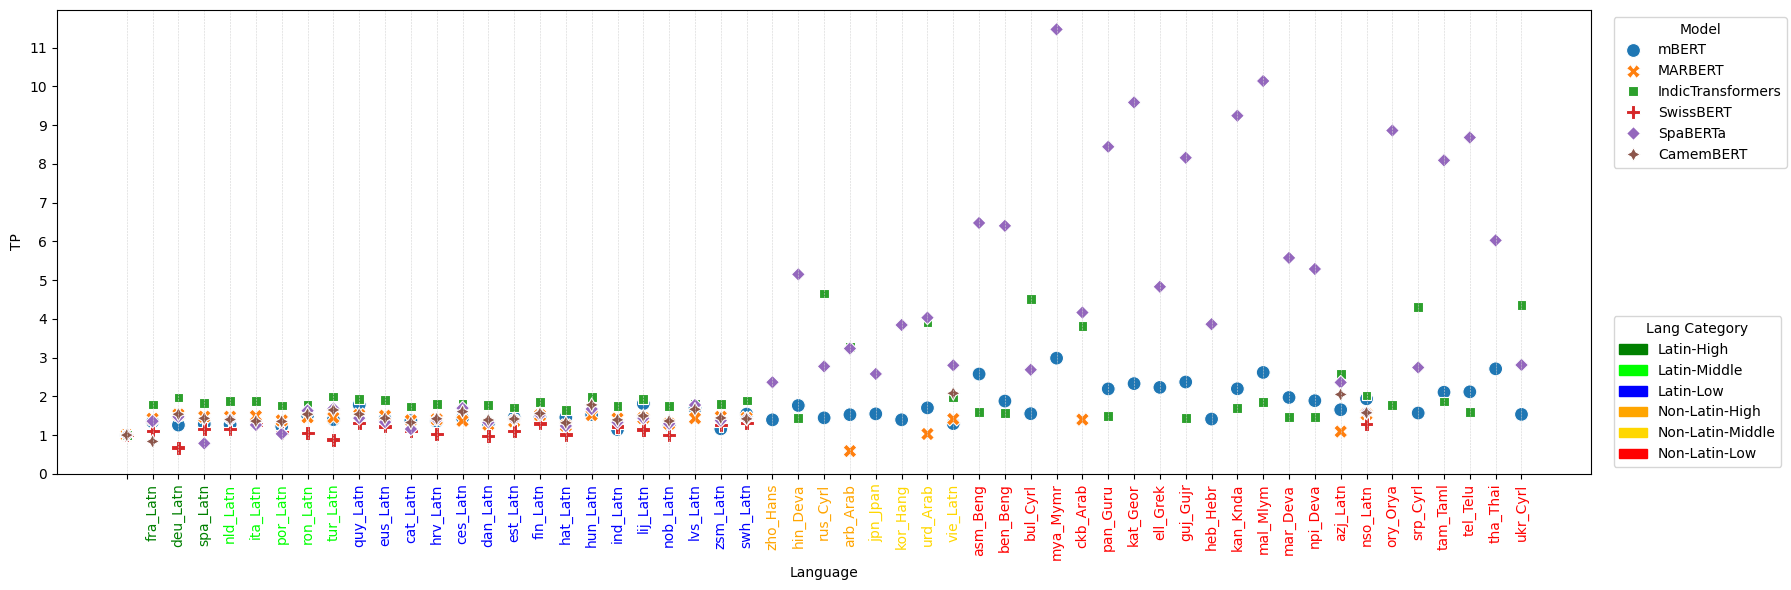

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch

# ---- Mapping language → category ----
language_to_category = dict(zip(df_tp['flores_code'], df_tp['category']))

# ---- Color mapping for categories ----
category_colors = {
    'Latin-High': 'green',
    'Latin-Middle': 'lime',
    'Latin-Low': 'blue',
    'Non-Latin-High': 'orange',
    'Non-Latin-Middle': 'gold',
    'Non-Latin-Low': 'red'
}

# ---- Plot ----
plt.figure(figsize=(18, 6))
ax = sns.scatterplot(
    data=df_tp,
    x='language',
    y='tp',
    hue='model',
    style='model',
    s=100
)

# Add vertical lines
for i, lang in enumerate(df_tp['flores_code'].unique()):
    plt.axvline(x=i, color='lightgray', linestyle='--', linewidth=0.4)

# Set x-ticks and rotate
xticks = list(df_tp['flores_code'].unique())
ax.set_xticks(range(len(xticks)))
ax.set_xticklabels(xticks, rotation=90)

# Color tick labels by category
for tick_label in ax.get_xticklabels():
    lang = tick_label.get_text()
    cat = language_to_category.get(lang)
    if cat:
        tick_label.set_color(category_colors[cat])

# ---- Add category legend manually ----
handles, labels = ax.get_legend_handles_labels()
category_patches = [
    Patch(color=color, label=label) for label, color in category_colors.items()
]

# Position both legends
legend1 = ax.legend(handles=handles, title='Model', loc='upper left', bbox_to_anchor=(1.01, 1))
legend2 = ax.legend(handles=category_patches, title='Lang Category', loc='lower left', bbox_to_anchor=(1.01, 0))
ax.add_artist(legend1)  # Ensure model legend stays

# ---- Y-axis customization ----
ymax = df_tp['tp'].max()
ax.set_yticks(np.arange(0, int(ymax) + 1, 1))  # ticks 0,1,2,...
ax.set_ylim(0, ymax + 0.5)  # padding above last tick

# Final touches
# ax.set_title("Tokenization Parity (TP) across Languages by Encoder variants")
ax.set_ylabel("TP")
ax.set_xlabel("Language")
plt.tight_layout()
plt.show()


**Other Analysis**

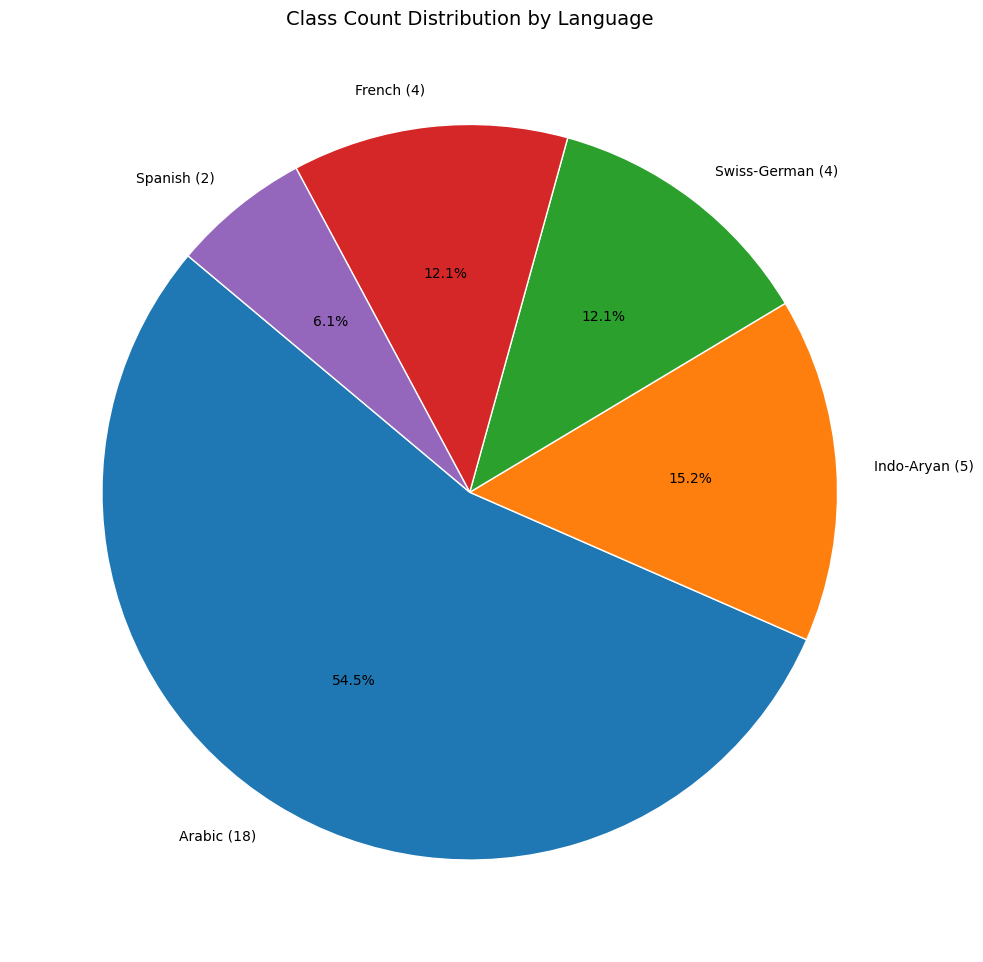

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame based on your LaTeX table (add all actual values)
data = {
    "Language": [
        "Arabic", "Swiss-German", "Indo-Aryan",
        "French", "Spanish"
    ],
    "Class_Count": [18, 4, 5, 4, 2]
}

df = pd.DataFrame(data)



# Sample: Replace this with your actual data
# df_class = pd.DataFrame({
#     'language': ['Arabic', 'French', 'Spanish', 'Hindi'],
#     'class_count': [18, 4, 2, 5]
# })

# Sort by class_count to make labels clearer in the plot
df_class_sorted = df.sort_values(by='Class_Count', ascending=False)

# Plot
plt.figure(figsize=(10, 10))
plt.pie(
    df_class_sorted['Class_Count'],
    labels=[f"{lang} ({count})" for lang, count in zip(df_class_sorted['Language'], df_class_sorted['Class_Count'])],
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
plt.title("Class Count Distribution by Language", fontsize=14)
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd

data = {
    "Dataset": ["NADI", "GDI", "ILI", "DSL-FR", "DSL-ES", "DSL-FR (ML)", "DSL-ES (ML)"],
    "Class_Count": [18, 4, 5, 4, 2, 4, 2],
    #"phi3.5-mini": [0.54, 0.49, 0.74, 0.61, 0.40, 0.61, 0.53],
    #"Llama 3.2": [0.26, 0.46, 0.32, 0.35, 0.79, 0.35, 1.00],
    "BERT-base": [0.47, 0.62, 0.81, 0.67, 0.81, 0.36, 0.85],
    "mBERT": [0.62, 0.59, 0.88, 0.70, 0.83, 0.28, 0.78],
    "Language-Specific": [
        0.84, 0.60, 0.90, 0.75, 0.85, 0.44, 0.89
    ],
    "Language-Specific-Model": [
        "MARBERT", "Swiss-BERT", "IndicTransformers", "CamemBERT", "spanBERTa", "CamemBERT", "spanBERTa"
    ],
    "IP": [None]*7,  # to be filled later
    "TP": [None]*7,  # to be filled later
}

df = pd.DataFrame(data)

In [ ]:
df

,Dataset,Class_Count,phi3.5-mini,Llama 3.2,BERT-base,mBERT,Language-Specific,Language-Specific-Model,IP,TP
0,NADI,18,0.54,0.26,0.47,0.62,0.84,MARBERT,None,None
1,GDI,4,0.49,0.46,0.62,0.59,0.60,Swiss-BERT,None,None
2,ILI,5,0.74,0.32,0.81,0.88,0.90,IndicTransformers,None,None
3,DSL-FR,4,0.61,0.35,0.67,0.70,0.75,CamemBERT,None,None
4,DSL-ES,2,0.40,0.79,0.81,0.83,0.85,spanBERTa,None,None
5,DSL-FR (ML),4,0.61,0.35,0.36,0.28,0.44,CamemBERT,None,None
6,DSL-ES (ML),2,0.53,1.00,0.85,0.78,0.89,spanBERTa,None,None


In [ ]:
ip_values_llama = {
    "Arabic": 0.63084, #ar
    "German": 0.7714,#de
    "Hindi": 0.6433, #hi
    "French": 0.8093,#fr
    "Spanish": 0.7546,#es
    #"DSL-FR (ML)": 0.8093,#fr
    #"DSL-ES (ML)": 0.7546# es
}
ip_values_phi = {
    "Arabic": 0.6533, #ar
    "German": 0.8342,#de
    "Hindi": 0.5832, #hi
    "French": 0.8761,#fr
    "Spanish": 0.7956,#es
    #"DSL-FR (ML)": 0.8761,#fr
    #"DSL-ES (ML)": 0.7956# es
}


tp_values_phi = {
    "Arabic": 3.413,
    "German": 1.4096,
    "Hindi": 4.577,
    "French": 1.473,
    "Spanish": 1.4489,
    #"DSL-FR (ML)": 1.473,
    #"DSL-ES (ML)": 1.4489
}

tp_values_llama = {
    "Arabic": 1.6504,
    "German": 1.5822,
    "Hindi": 2.525,
    "French": 1.6037,
    "Spanish": 1.5429,
    #"DSL-FR (ML)": 1.6037,
    #"DSL-ES (ML)": 1.5429
}
#'French', 'Hindi', 'Spanish', 'German','Standard Arabic'
#1.34550367, 1.76371761, 1.28671886, 1.25817514,1.52591104]
tp_values_mBERT = {
    "Arabic": 1.525,
    "German": 1.258,
    "Hindi": 1.763,
    "French": 1.345,
    "Spanish": 1.286,

}


In [ ]:
df = pd.DataFrame({
    "Dataset": ["Arabic", "German", "Hindi", "French", "DSL-ES"],
    "phi3.5-mini": [0.54, 0.49, 0.74, 0.61, 0.40],
    "Llama 3.2": [0.26, 0.46, 0.32, 0.35, 0.79],
    "mBERT":[0.62,0.59,0.88,0.7,0.83]
})
df["phi_ip"] = df["Dataset"].map(ip_values_phi)
df["llama_ip"] = df["Dataset"].map(ip_values_llama)
df["phi_tp"] = df["Dataset"].map(tp_values_phi)
df["llama_tp"] = df["Dataset"].map(tp_values_llama)
df["mBERT_tp"] = df["Dataset"].map(tp_values_mBERT)

In [ ]:
df

,Dataset,phi3.5-mini,Llama 3.2,mBERT,phi_ip,llama_ip,phi_tp,llama_tp,mBERT_tp
0,Arabic,0.54,0.26,0.62,0.6533,0.63084,3.4130,1.6504,1.525
1,German,0.49,0.46,0.59,0.8342,0.77140,1.4096,1.5822,1.258
2,Hindi,0.74,0.32,0.88,0.5832,0.64330,4.5770,2.5250,1.763
3,French,0.61,0.35,0.70,0.8761,0.80930,1.4730,1.6037,1.345
4,DSL-ES,0.40,0.79,0.83,NaN,NaN,NaN,NaN,NaN


In [ ]:
phi_corr = df[["phi3.5-mini", "phi_ip", "phi_tp"]].corr()
llama_corr = df[["Llama 3.2", "llama_ip", "llama_tp"]].corr()
mBERT_corr = df[["mBERT","mBERT_tp"]].corr()
print("Phi correlations:\n", phi_corr)
print("\nLLaMA correlations:\n", llama_corr)
print("\nmBERT correlations:\n", mBERT_corr)

Phi correlations:
              phi3.5-mini    phi_ip    phi_tp
phi3.5-mini     1.000000 -0.547369  0.733701
phi_ip         -0.547369  1.000000 -0.968892
phi_tp          0.733701 -0.968892  1.000000

LLaMA correlations:
            Llama 3.2  llama_ip  llama_tp
Llama 3.2   1.000000  0.450325 -0.389277
llama_ip    0.450325  1.000000 -0.595858
llama_tp   -0.389277 -0.595858  1.000000

mBERT correlations:
             mBERT  mBERT_tp
mBERT     1.00000   0.48366
mBERT_tp  0.48366   1.00000


In [ ]:
df_mono = pd.DataFrame({
    "Dataset": ["NADI", "GDI", "ILI"],
    "phi3.5-mini": [0.54, 0.49, 0.74],
    "Llama 3.2": [0.26, 0.46, 0.32]
})
phi_ip_df = pd.DataFrame(list(ip_values_phi.items())[:3], columns=["Dataset", "phi_ip"])
phi_tp_df = pd.DataFrame(list(tp_values_phi.items())[:3], columns=["Dataset", "phi_tp"])
llama_ip_df = pd.DataFrame(list(ip_values_llama.items())[:3], columns=["Dataset", "llama_ip"])
llama_tp_df = pd.DataFrame(list(tp_values_llama.items())[:3], columns=["Dataset", "llama_tp"])
# Merge the two
phi_df = pd.merge(phi_ip_df, phi_tp_df, on="Dataset", how="left")
llama_df = pd.merge(llama_ip_df, llama_tp_df, on="Dataset", how="left")
df_mono = pd.merge(df_mono, phi_df, on="Dataset", how="left")
df_mono= pd.merge(df_mono, llama_df, on="Dataset", how="left")


phi_corr = df_mono[["phi3.5-mini", "phi_ip", "phi_tp"]].corr()
llama_corr = df_mono[["Llama 3.2", "llama_ip", "llama_tp"]].corr()

print("Phi correlations-Mono:\n", phi_corr)
print("\nLLaMA correlations-Mono:\n", llama_corr)

Phi correlations-Mono:
              phi3.5-mini    phi_ip    phi_tp
phi3.5-mini     1.000000 -0.834802  0.884535
phi_ip         -0.834802  1.000000 -0.995229
phi_tp          0.884535 -0.995229  1.000000

LLaMA correlations-Mono:
            Llama 3.2  llama_ip  llama_tp
Llama 3.2   1.000000  0.976660 -0.287741
llama_ip    0.976660  1.000000 -0.486734
llama_tp   -0.287741 -0.486734  1.000000


In [ ]:
df_multi = pd.DataFrame({
    "Dataset": ["DSL-FR", "DSL-ES", "DSL-FR (ML)", "DSL-ES (ML)"],
    "phi3.5-mini": [ 0.61, 0.40, 0.61, 0.53],
    "Llama 3.2": [ 0.35, 0.79, 0.35, 1.00]
})
phi_ip_df = pd.DataFrame(list(ip_values_phi.items())[3:], columns=["Dataset", "phi_ip"])
phi_tp_df = pd.DataFrame(list(tp_values_phi.items())[3:], columns=["Dataset", "phi_tp"])
llama_ip_df = pd.DataFrame(list(ip_values_llama.items())[3:], columns=["Dataset", "llama_ip"])
llama_tp_df = pd.DataFrame(list(tp_values_llama.items())[3:], columns=["Dataset", "llama_tp"])
# Merge the two
phi_df = pd.merge(phi_ip_df, phi_tp_df, on="Dataset", how="left")
llama_df = pd.merge(llama_ip_df, llama_tp_df, on="Dataset", how="left")
df_multi = pd.merge(df_multi, phi_df, on="Dataset", how="left")
df_multi= pd.merge(df_multi, llama_df, on="Dataset", how="left")


phi_corr = df_multi[["phi3.5-mini", "phi_ip", "phi_tp"]].corr()
llama_corr = df_multi[["Llama 3.2", "llama_ip", "llama_tp"]].corr()

print("Phi correlations-multi:\n", phi_corr)
print("\nLLaMA correlations-multi:\n", llama_corr)

Phi correlations-multi:
              phi3.5-mini    phi_ip    phi_tp
phi3.5-mini     1.000000  0.844581  0.844581
phi_ip          0.844581  1.000000  1.000000
phi_tp          0.844581  1.000000  1.000000

LLaMA correlations-multi:
            Llama 3.2  llama_ip  llama_tp
Llama 3.2   1.000000 -0.964828 -0.964828
llama_ip   -0.964828  1.000000  1.000000
llama_tp   -0.964828  1.000000  1.000000


In [ ]:
data = {
    "Dataset": ["NADI", "GDI", "ILI", "DSL-FR", "DSL-ES", "DSL-FR (ML)", "DSL-ES (ML)"],
    "Class_Count": [18, 4, 5, 4, 2, 4, 2],
    #"phi3.5-mini": [0.54, 0.49, 0.74, 0.61, 0.40, 0.61, 0.53],
    #"Llama 3.2": [0.26, 0.46, 0.32, 0.35, 0.79, 0.35, 1.00],
    "BERT-base": [0.47, 0.62, 0.81, 0.67, 0.81, 0.36, 0.85],
    "mBERT": [0.62, 0.59, 0.88, 0.70, 0.83, 0.28, 0.78],
    "Language-Specific": [
        0.84, 0.60, 0.90, 0.75, 0.85, 0.44, 0.89
    ],
    "Language-Specific-Model": [
        "MARBERT", "Swiss-BERT", "IndicTransformers", "CamemBERT", "spanBERTa", "CamemBERT", "spanBERTa"
    ]
}

df_enc = pd.DataFrame(data)

In [ ]:
df_enc

,Dataset,Class_Count,BERT-base,mBERT,Language-Specific,Language-Specific-Model
0,NADI,18,0.47,0.62,0.84,MARBERT
1,GDI,4,0.62,0.59,0.60,Swiss-BERT
2,ILI,5,0.81,0.88,0.90,IndicTransformers
3,DSL-FR,4,0.67,0.70,0.75,CamemBERT
4,DSL-ES,2,0.81,0.83,0.85,spanBERTa
5,DSL-FR (ML),4,0.36,0.28,0.44,CamemBERT
6,DSL-ES (ML),2,0.85,0.78,0.89,spanBERTa


In [ ]:
tp_values_bert = {
    "NADI": 3.249, #ar
    "GDI": 2.156,#de
    "ILI": 2.532, #hi
    "DSL-FR": 2.285,#fr
    "DSL-ES": 2.0727,#es
    "DSL-FR (ML)": 2.285,#fr
    "DSL-ES (ML)": 2.0727# es
}
tp_values_mbert = {
    "NADI": 1.525, #ar
    "GDI": 1.258,#de
    "ILI": 1.763, #hi
    "DSL-FR": 1.3455,#fr
    "DSL-ES": 1.286,#es
    "DSL-FR (ML)": 1.3455,#fr
    "DSL-ES (ML)": 1.286# es
}

tp_values_langspecific = {
    "NADI": 0.5878,
    "GDI": 0.6732,
    "ILI": 1.432,
    "DSL-FR": 0.836,
    "DSL-ES": 0.7865,
    "DSL-FR (ML)": 0.836,
    "DSL-ES (ML)": 0.7865
}
df_enc["tp_values_bert"] = df["Dataset"].map(tp_values_bert)
df_enc["tp_values_mbert"] = df["Dataset"].map(tp_values_mbert)
df_enc["tp_values_langspecific"] = df["Dataset"].map(tp_values_langspecific)


# tp_values_langspecific_target = {
#     "NADI": 0.5878,
#     "GDI": 0.6732,
#     "ILI": 1.432,
#     "DSL-FR": 0.836,
#     "DSL-ES": 0.7865,
#     "DSL-FR (ML)": 0.836,
#     "DSL-ES (ML)": 0.7865
# }

# tp_values_llama = {
#     "NADI": 1.6504,
#     "GDI": 1.5822,
#     "ILI": 2.525,
#     "DSL-FR": 1.6037,
#     "DSL-ES": 1.5429,
#     "DSL-FR (ML)": 1.6037,
#     "DSL-ES (ML)": 1.5429
# }


In [ ]:
df_enc

,Dataset,Class_Count,BERT-base,mBERT,Language-Specific,Language-Specific-Model,tp_values_bert,tp_values_mbert,tp_values_langspecific
0,NADI,18,0.47,0.62,0.84,MARBERT,3.2490,1.5250,0.5878
1,GDI,4,0.62,0.59,0.60,Swiss-BERT,2.1560,1.2580,0.6732
2,ILI,5,0.81,0.88,0.90,IndicTransformers,2.5320,1.7630,1.4320
3,DSL-FR,4,0.67,0.70,0.75,CamemBERT,2.2850,1.3455,0.8360
4,DSL-ES,2,0.81,0.83,0.85,spanBERTa,2.0727,1.2860,0.7865
5,DSL-FR (ML),4,0.36,0.28,0.44,CamemBERT,2.2850,1.3455,0.8360
6,DSL-ES (ML),2,0.85,0.78,0.89,spanBERTa,2.0727,1.2860,0.7865


In [ ]:
bert_corr = df_enc[["BERT-base", "tp_values_bert"]].corr()
mbert_corr = df_enc[["mBERT", "tp_values_mbert"]].corr()
lang_corr=df_enc[["Language-Specific", "tp_values_langspecific"]].corr()
print("BERT correlations:\n", bert_corr)
print("\nmBERT correlations:\n", mbert_corr)
print("\nlang_specific_corr correlations:\n", lang_corr)

BERT correlations:
                 BERT-base  tp_values_bert
BERT-base        1.000000       -0.452366
tp_values_bert  -0.452366        1.000000

mBERT correlations:
                     mBERT  tp_values_mbert
mBERT            1.000000         0.318368
tp_values_mbert  0.318368         1.000000

lang_specific_corr correlations:
                         Language-Specific  tp_values_langspecific
Language-Specific                1.000000                0.280693
tp_values_langspecific           0.280693                1.000000


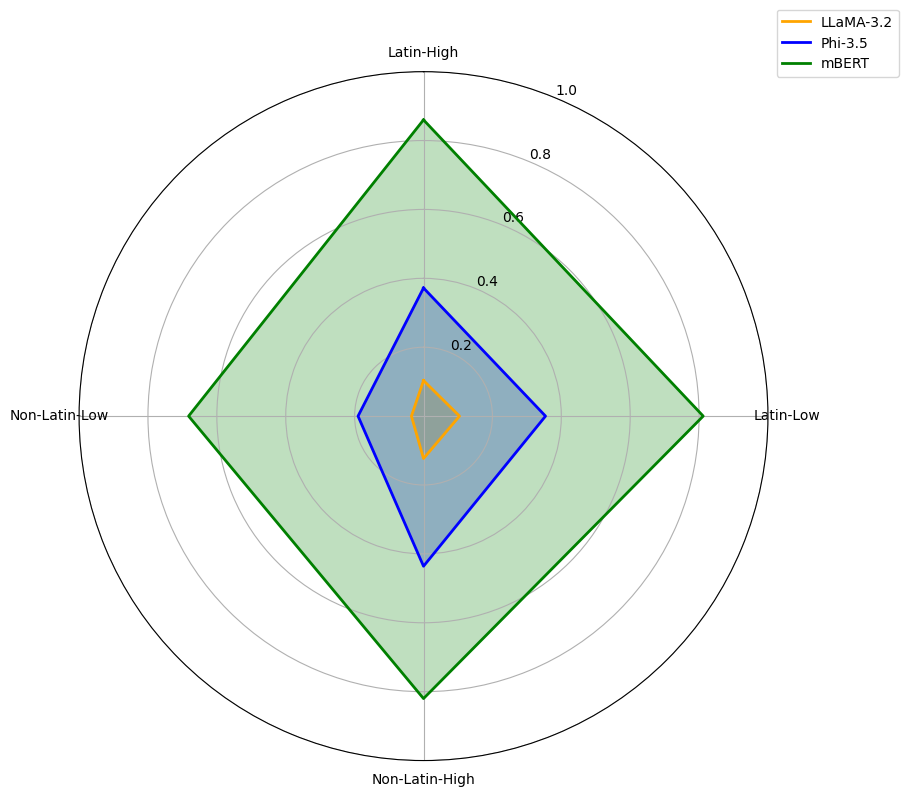

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the data (avg F1 scores per category and model)
data = {
    'Category': ['Latin-High', 'Latin-Low', 'Non-Latin-High', 'Non-Latin-Low'],
    'LLaMA-3.2': [0.1032, 0.1045, 0.1231, 0.0351],
    'Phi-3.5': [0.3720, 0.3542, 0.4358, 0.1901],
    'mBERT': [0.860, 0.812, 0.820, 0.682]
}

df = pd.DataFrame(data)

# Radar chart setup
labels = df['Category'].values
num_vars = len(labels)

# Compute angles for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # complete the loop

# Plot setup
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

# Function to add model data
def add_to_radar(ax, values, label, color):
    values = values + values[:1]
    ax.plot(angles, values, label=label, color=color, linewidth=2)
    ax.fill(angles, values, color=color, alpha=0.25)

# Add models
add_to_radar(ax, df['LLaMA-3.2'].tolist(), 'LLaMA-3.2', 'orange')
add_to_radar(ax, df['Phi-3.5'].tolist(), 'Phi-3.5', 'blue')
add_to_radar(ax, df['mBERT'].tolist(), 'mBERT', 'green')

# Style the chart
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_ylim(0, 1)
#ax.set_title('Average Macro F1 Score per Category (Topic Classification)', fontsize=12)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

plt.tight_layout()
plt.show()


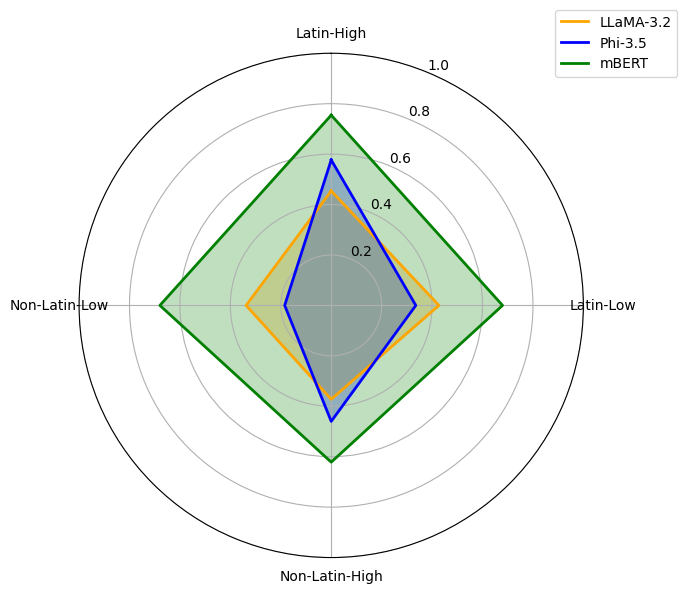

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Average F1 scores (manually calculated from the table you gave)
category_labels = ['Latin-High', 'Latin-Low', 'Non-Latin-High', 'Non-Latin-Low']

avg_f1 = {
    'LLaMA-3.2': [
        0.4541,  # Latin-High
        (0.443695 + 0.410629) / 2,  # Latin-Low
        (0.361613 + 0.361082 + 0.360686 + 0.358351 + 0.359525 + 0.357209 + 0.345871 + 0.432525 + 0.414520) / 9,  # Non-Latin-High
        (0.325579 + 0.349494) / 2  # Non-Latin-Low
    ],
    'Phi-3.5': [
        0.5769,  # Latin-High
        (0.350143 + 0.320931) / 2,
        (0.457623 + 0.445782 + 0.45141 + 0.448329 + 0.456000 + 0.455835 + 0.441766 + 0.481986 + 0.500209) / 9,
        (0.176780 + 0.192330) / 2
    ],
    'mBERT': [
        0.7545,  # Latin-High
        (0.724 + 0.635) / 2,
        (0.778 + 0.767 + 0.773 + 0.767 + 0.775 + 0.778 + 0.765 + 0.10 + 0.092) / 9,
        (0.686 + 0.673) / 2
    ]
}

# Setup radar chart
angles = np.linspace(0, 2 * np.pi, len(category_labels), endpoint=False).tolist()
angles += angles[:1]  # close the loop

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

# Plotting function
def plot_model(ax, values, label, color):
    values += values[:1]
    ax.plot(angles, values, label=label, color=color, linewidth=2)
    ax.fill(angles, values, color=color, alpha=0.25)

# Plot each model
plot_model(ax, avg_f1['LLaMA-3.2'], 'LLaMA-3.2', 'orange')
plot_model(ax, avg_f1['Phi-3.5'], 'Phi-3.5', 'blue')
plot_model(ax, avg_f1['mBERT'], 'mBERT', 'green')

# Aesthetics
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), category_labels)
ax.set_ylim(0, 1)
#ax.set_title('Average F1 Score by Category - Dialectal EQA', fontsize=14)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

plt.tight_layout()
plt.show()


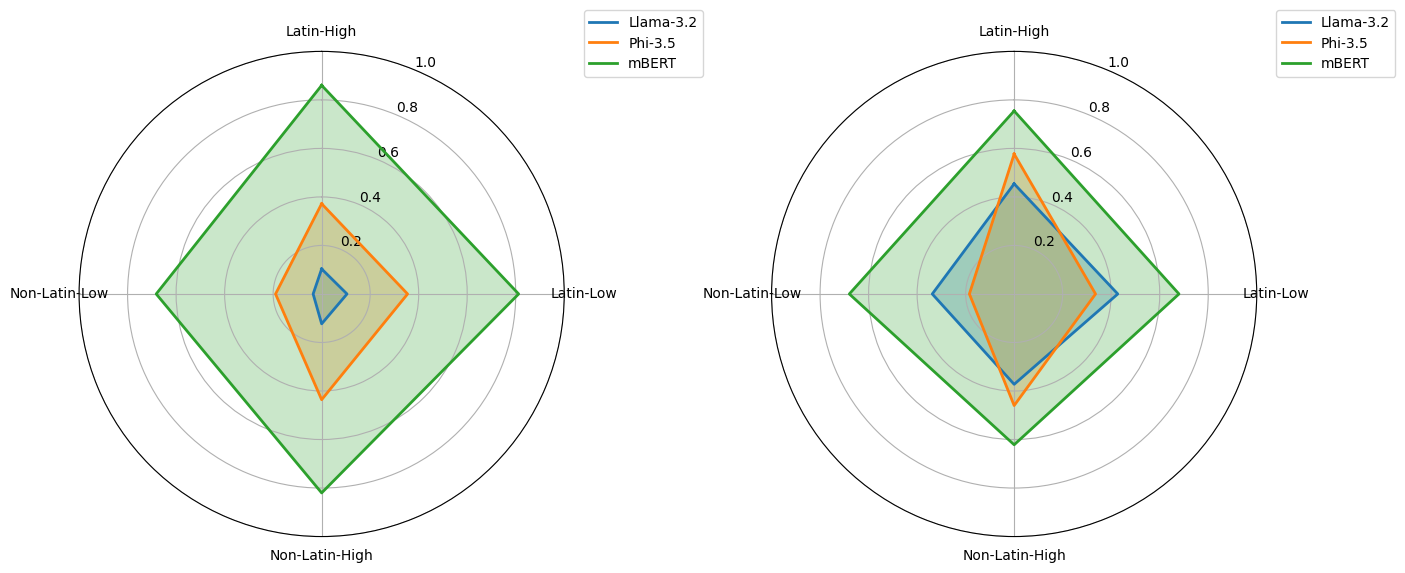

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Shared categories
category_labels = ['Latin-High', 'Latin-Low', 'Non-Latin-High', 'Non-Latin-Low']
angles = np.linspace(0, 2 * np.pi, len(category_labels), endpoint=False).tolist()
angles += angles[:1]  # close the loop

# === Data: Average F1 Scores ===

# Topic Classification (TC)

tc_avg_f1 = {
    'Llama-3.2': [0.1032, 0.1045, 0.1231, 0.0351],
    'Phi-3.5': [0.3720, 0.3542, 0.4358, 0.1901],
    'mBERT': [0.860, 0.812, 0.820, 0.682]}#

# Extractive QA (EQA)
eqa_avg_f1 = {
    'Llama-3.2': [0.4541, (0.443695 + 0.410629) / 2,
                 (0.361613 + 0.361082 + 0.360686 + 0.358351 + 0.359525 + 0.357209 + 0.345871 + 0.432525 + 0.414520) / 9,
                 (0.325579 + 0.349494) / 2],
    'Phi-3.5': [0.5769, (0.350143 + 0.320931) / 2,
                (0.457623 + 0.445782 + 0.45141 + 0.448329 + 0.456000 + 0.455835 + 0.441766 + 0.481986 + 0.500209) / 9,
                (0.176780 + 0.192330) / 2],
    'mBERT': [0.7545, (0.724 + 0.635) / 2,
              (0.778 + 0.767 + 0.773 + 0.767 + 0.775 + 0.778 + 0.765 + 0.10 + 0.092) / 9,
              (0.686 + 0.673) / 2]
}

# === Radar Plot Function ===
def plot_radar(ax, data_dict,title):
    for model, values in data_dict.items():
        values += values[:1]
        ax.plot(angles, values, label=model, linewidth=2)
        ax.fill(angles, values, alpha=0.25)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), category_labels)
    #ax.set_ylim(0, 1 if title.startswith('Topic') else 1)
    ax.set_ylim(0, 1)
    #ax.set_title(title, size=8)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# === Create Subplots ===
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw=dict(polar=True), figsize=(14, 6))
#Topic Classification (TC) - Avg F1 by Category','Extractive QA (EQA) - Avg F1 by Category'
plot_radar(ax1, tc_avg_f1,'Topic Classification (TC) - Avg F1 by Category')
plot_radar(ax2, eqa_avg_f1,'Extractive QA (EQA) - Avg F1 by Category')
plt.subplots_adjust(top=0.85, wspace=0.5)
plt.tight_layout()
plt.show()


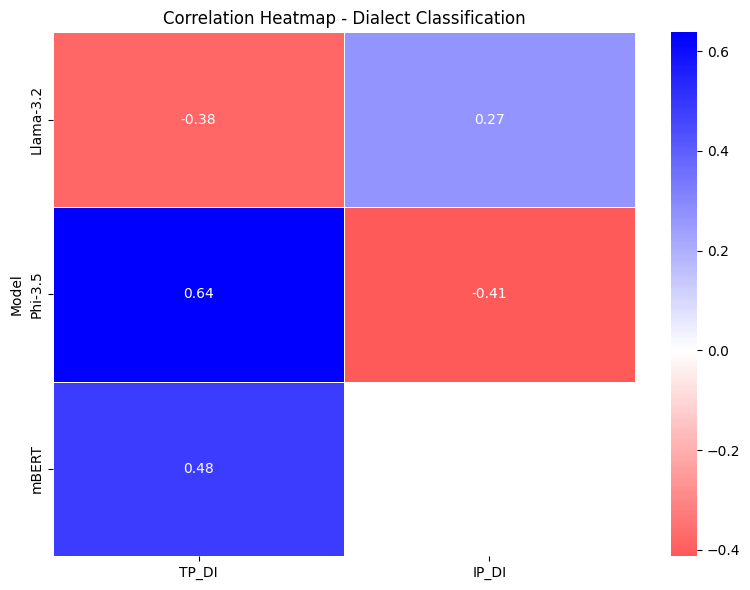

TypeError: DataFrame.pivot() missing 1 required keyword-only argument: 'columns'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Your existing data and df creation code remains the same...
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the data
data = {
    'Task': [
        'DI', 'DI', 'DI',
        'TC', 'TC - Latin-High', 'TC - Latin-Low', 'TC - Non-Latin-High', 'TC - Non-Latin-Low',
        'TC', 'TC - Latin-High', 'TC - Latin-Low', 'TC - Non-Latin-High', 'TC - Non-Latin-Low',
        'TC', 'TC - Latin-High', 'TC - Latin-Low', 'TC - Non-Latin-High', 'TC - Non-Latin-Low',
        'EQA', 'EQA', 'EQA'
    ],
    'Model': [
        'Phi-3.5', 'Llama-3.2', 'mBERT',
        'Phi-3.5', 'Phi-3.5', 'Phi-3.5', 'Phi-3.5', 'Phi-3.5',
        'Llama-3.2', 'Llama-3.2', 'Llama-3.2', 'Llama-3.2', 'Llama-3.2',
        'mBERT', 'mBERT', 'mBERT', 'mBERT', 'mBERT',
        'Phi-3.5', 'Llama-3.2', 'mBERT'
    ],
    'TP': [
        0.638, -0.380, 0.4836,
        -0.683, 0.873, -0.785, 0.202, 0.876,
        -0.716, 0.974, 0.077, -0.547, -0.805,
        -0.605, -0.242, -0.706, -0.826, -0.828,
        -0.834, -0.528, -0.938
    ],
    'IP': [
        -0.413, 0.268, None,
        0.812, 0.765, 0.165, -0.862, 0.634,
        0.687, 0.671, 0.328, 0.209, 0.623,
        None, None, None, None, None,
        0.618, 0.097, None
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert 'Task' to a short label for plot titles
task_map = {
    'DI': 'Dialect Classification',
    'TC': 'Topic Classification',
    'EQA': 'Extractive QA'
}
df['TaskGroup'] = df['Task'].apply(lambda x: task_map.get(x.split()[0], x.split()[0]))

# Define a custom diverging colormap with blue for positive, red for negative
from matplotlib.colors import LinearSegmentedColormap
cmap_blue_pos = LinearSegmentedColormap.from_list("BluePosRedNeg", ["red", "white", "blue"])

# Plot heatmaps by task
for task in df['TaskGroup'].unique():
    if task == 'Topic Classification':
        # For TC, aggregate by averaging TP and IP per model (excluding subcategories)
        tc_df = df[df['TaskGroup'] == 'Topic Classification'].copy()

        # Keep only overall TC rows (Task == 'TC' without suffix)
        tc_avg = tc_df[tc_df['Task'] == 'TC'].pivot(index='Model', values=['TP', 'IP'])

        plt.figure(figsize=(6, 4))
        sns.heatmap(tc_avg, annot=True, fmt=".2f", center=0, cmap=cmap_blue_pos, linewidths=0.5)
        plt.title("Correlation Heatmap - Topic Classification (Average)")
        plt.tight_layout()
        plt.show()

    else:
        # For other tasks, keep detailed categories as before
        sub_df = df[df['TaskGroup'] == task].copy()
        pivoted = sub_df.pivot(index='Model', columns='Task', values=['TP', 'IP'])

        # Flatten MultiIndex columns
        pivoted.columns = [f'{metric}_{cat}' for metric, cat in pivoted.columns]

        plt.figure(figsize=(8, 6))
        sns.heatmap(pivoted, annot=True, fmt=".2f", center=0, cmap=cmap_blue_pos, linewidths=0.5)
        plt.title(f"Correlation Heatmap - {task}")
        plt.tight_layout()
        plt.show()


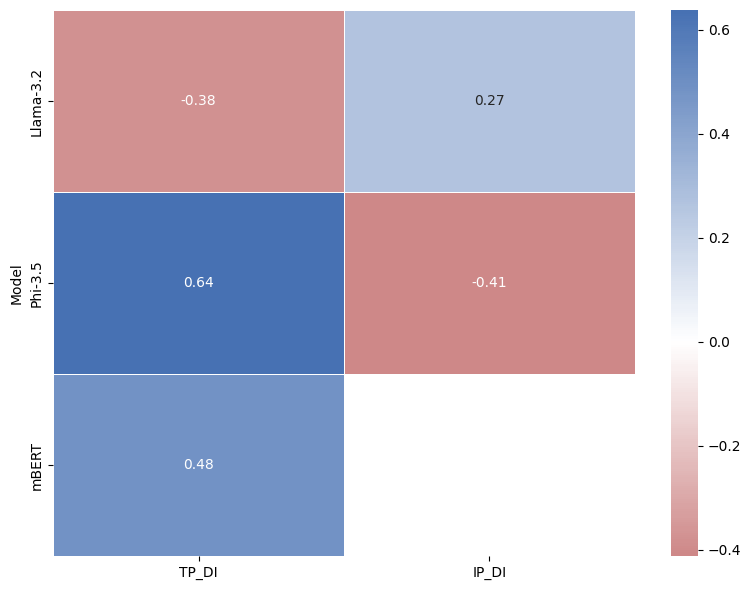

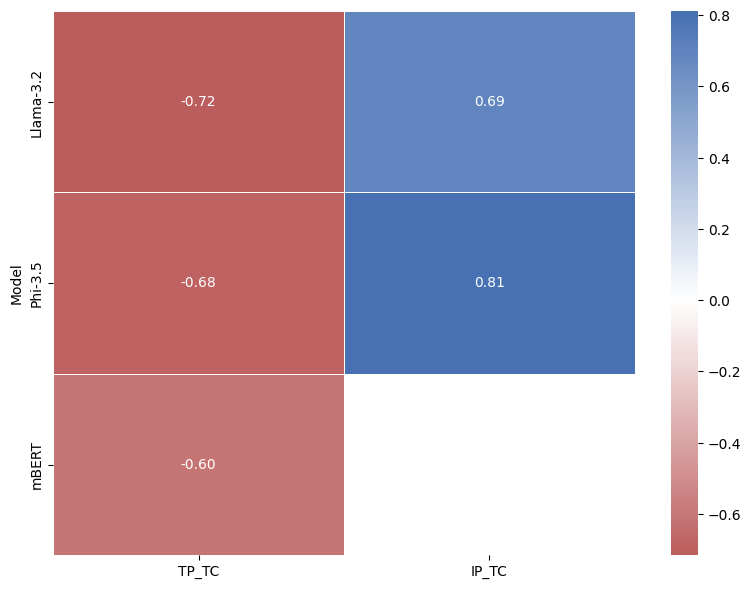

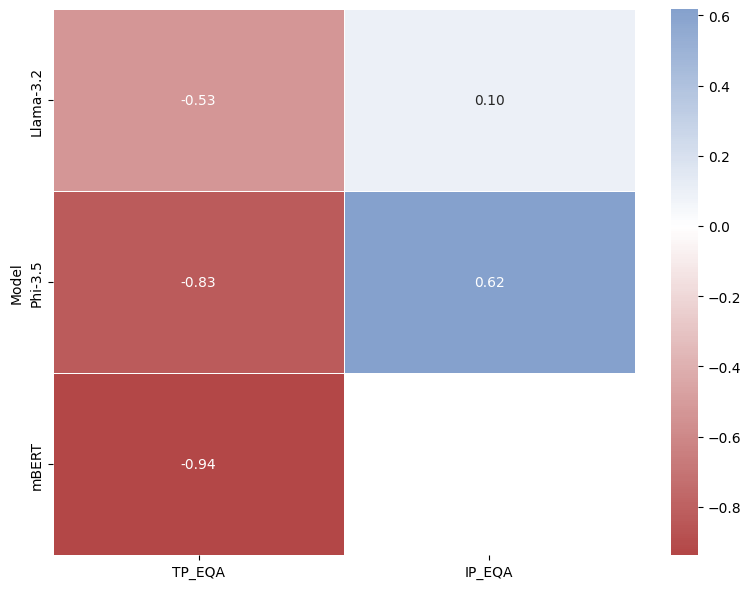

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the data
data = {
    # 'Task': [
    #     'DI', 'DI', 'DI',
    #     'TC', 'TC - Latin-High', 'TC - Latin-Low', 'TC - Non-Latin-High', 'TC - Non-Latin-Low',
    #     'TC', 'TC - Latin-High', 'TC - Latin-Low', 'TC - Non-Latin-High', 'TC - Non-Latin-Low',
    #     'TC', 'TC - Latin-High', 'TC - Latin-Low', 'TC - Non-Latin-High', 'TC - Non-Latin-Low',
    #     'EQA', 'EQA', 'EQA'
    # ],
    'Task': [
        'DI', 'DI', 'DI',
        'TC', 'TC','TC',
        #'TC', 'TC - Latin-High', 'TC - Latin-Low', 'TC - Non-Latin-High', 'TC - Non-Latin-Low',
        #'TC', 'TC - Latin-High', 'TC - Latin-Low', 'TC - Non-Latin-High', 'TC - Non-Latin-Low',
        'EQA', 'EQA', 'EQA'
    ],
    # 'Model': [
    #     'Phi-3.5', 'Llama-3.2', 'mBERT',
    #     'Phi-3.5', 'Phi-3.5', 'Phi-3.5', 'Phi-3.5', 'Phi-3.5',
    #     'Llama-3.2', 'Llama-3.2', 'Llama-3.2', 'Llama-3.2', 'Llama-3.2',
    #     'mBERT', 'mBERT', 'mBERT', 'mBERT', 'mBERT',
    #     'Phi-3.5', 'Llama-3.2', 'mBERT'
    # ],
     'Model': [
        'Phi-3.5', 'Llama-3.2', 'mBERT',
        'Phi-3.5', 'Llama-3.2', 'mBERT',
        'Phi-3.5', 'Llama-3.2', 'mBERT'
    ],
    # 'TP': [
    #     0.638, -0.380, 0.4836,
    #     -0.683, 0.873, -0.785, 0.202, 0.876,
    #     -0.716, 0.974, 0.077, -0.547, -0.805,
    #     -0.605, -0.242, -0.706, -0.826, -0.828,
    #     -0.834, -0.528, -0.938
    # ],
    'TP': [
        0.638, -0.380, 0.4836,
        -0.683, -0.716, -0.605,
        -0.834, -0.528, -0.938
    ],
    # 'IP': [
    #     -0.413, 0.268, None,
    #     0.812, 0.765, 0.165, -0.862, 0.634,
    #     0.687, 0.671, 0.328, 0.209, 0.623,
    #     None, None, None, None, None,
    #     0.618, 0.097, None
    # ]
    'IP': [
        -0.413, 0.268, None,
        0.812, 0.687, None,
        0.618, 0.097, None
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert 'Task' to a short label for plot titles
task_map = {
    'DI': 'Dialect Classification',
    'TC': 'Topic Classification',
    'EQA': 'Extractive QA'
}
df['TaskGroup'] = df['Task'].apply(lambda x: task_map.get(x.split()[0], x.split()[0]))
from matplotlib.colors import LinearSegmentedColormap
#cmap_blue_pos = LinearSegmentedColormap.from_list("BluePosRedNeg", ["red", "white", "blue"])
cmap_blue_pos = LinearSegmentedColormap.from_list(
    "BluePosRedNegSoft",
    ["#b34747", "white", "#4771b3"]  # muted red, white, muted blue
)
# Plot heatmaps by task
for task in df['TaskGroup'].unique():
    sub_df = df[df['TaskGroup'] == task].copy()
    pivoted = sub_df.pivot(index='Model', columns='Task', values=['TP', 'IP'])

    # Flatten MultiIndex
    pivoted.columns = [f'{metric}_{cat}' for metric, cat in pivoted.columns]

    plt.figure(figsize=(8, 6))
    sns.heatmap(pivoted, annot=True, fmt=".2f", center=0, cmap=cmap_blue_pos, linewidths=0.5)
    #plt.title(f"Correlation Heatmap - {task}")
    plt.tight_layout()
    plt.show()


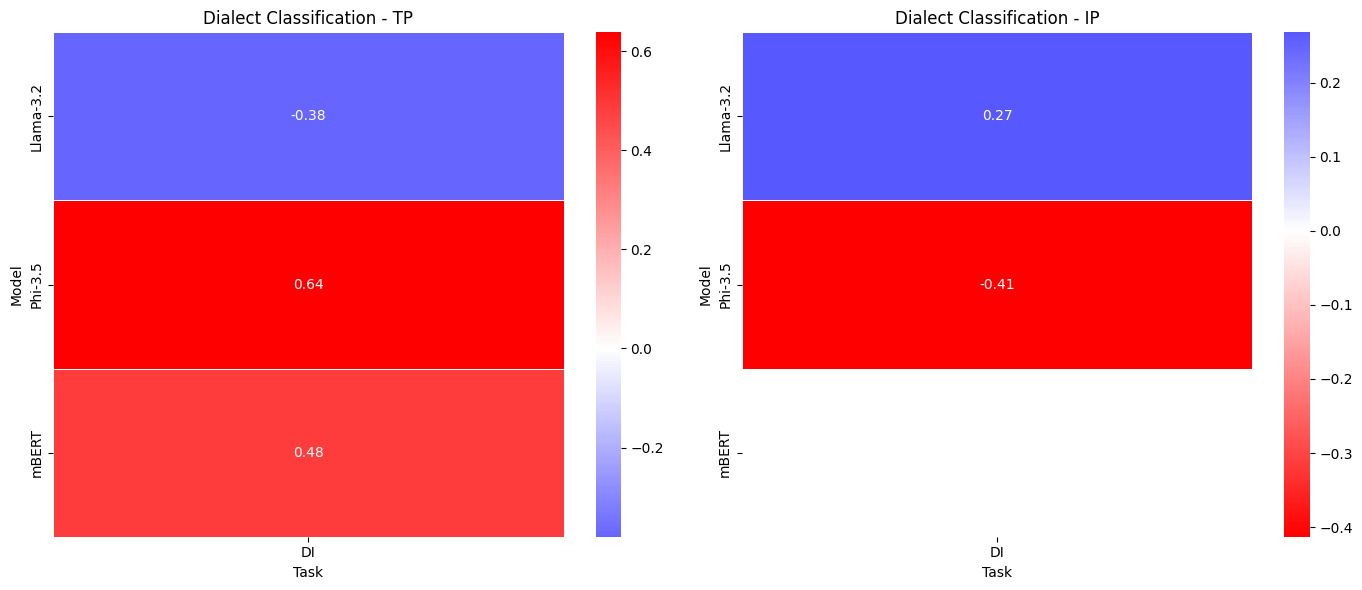

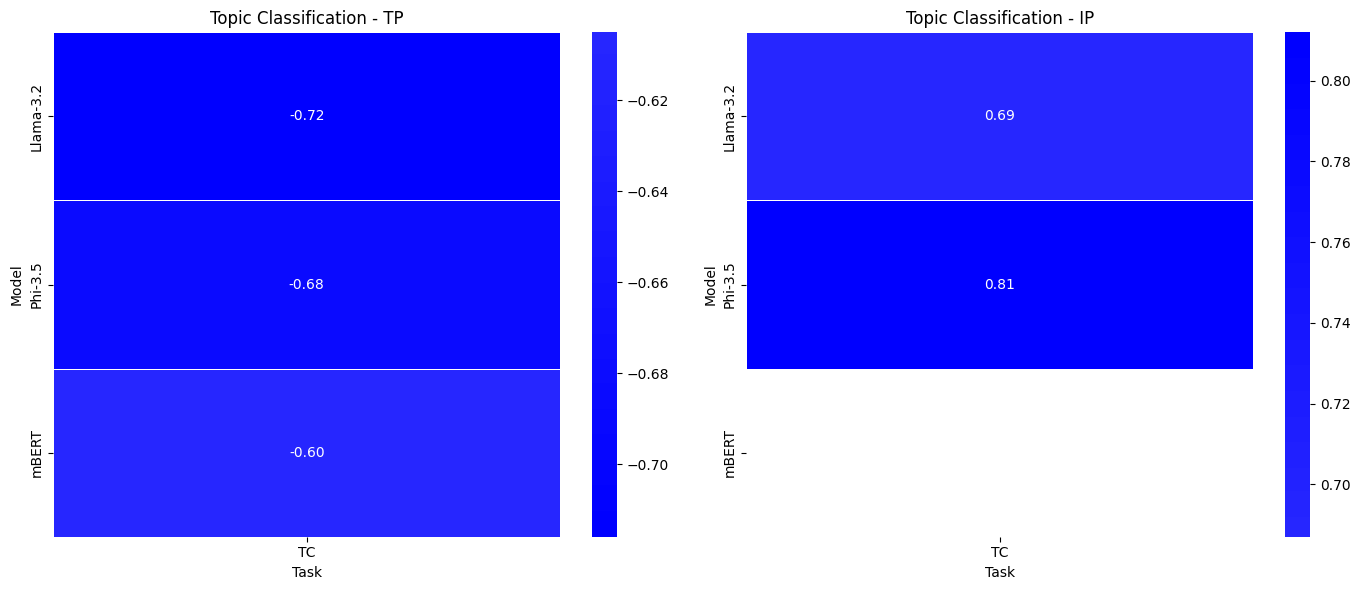

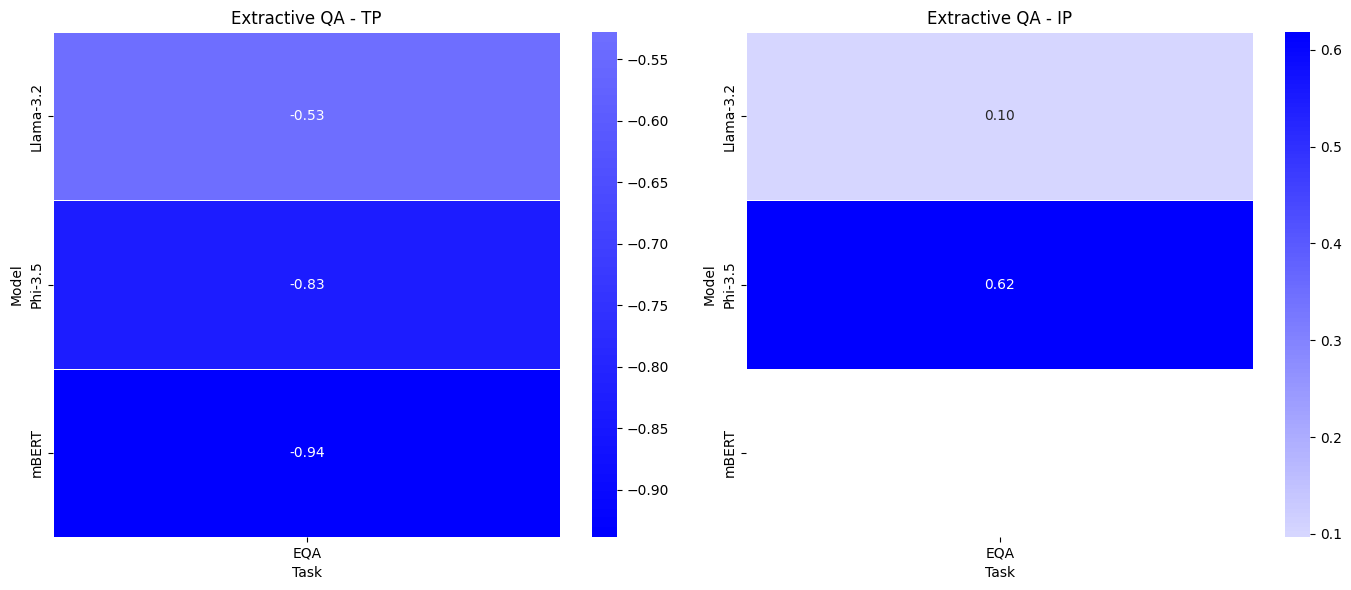

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

# Custom colormaps
cmap_tp = LinearSegmentedColormap.from_list("RedPosBlueNeg", ["blue", "white", "red"])
cmap_ip = LinearSegmentedColormap.from_list("BluePosRedNeg", ["red", "white", "blue"])

# Define the data
data = {
    'Task': [
        'DI', 'DI', 'DI',
        'TC', 'TC', 'TC',
        'EQA', 'EQA', 'EQA'
    ],
    'Model': [
        'Phi-3.5', 'Llama-3.2', 'mBERT',
        'Phi-3.5', 'Llama-3.2', 'mBERT',
        'Phi-3.5', 'Llama-3.2', 'mBERT'
    ],
    'TP': [
        0.638, -0.380, 0.4836,
        -0.683, -0.716, -0.605,
        -0.834, -0.528, -0.938
    ],
    'IP': [
        -0.413, 0.268, None,
        0.812, 0.687, None,
        0.618, 0.097, None
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Map tasks
task_map = {
    'DI': 'Dialect Classification',
    'TC': 'Topic Classification',
    'EQA': 'Extractive QA'
}
df['TaskGroup'] = df['Task'].map(lambda x: task_map.get(x, x))

# Plot for each task group
for task in df['TaskGroup'].unique():
    sub_df = df[df['TaskGroup'] == task].copy()

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Pivot for TP
    tp_pivot = sub_df.pivot(index='Model', columns='Task', values='TP')
    sns.heatmap(tp_pivot, annot=True, fmt=".2f", center=0, cmap=cmap_tp, linewidths=0.5, ax=axes[0])
    axes[0].set_title(f"{task} - TP")

    # Pivot for IP
    ip_pivot = sub_df.pivot(index='Model', columns='Task', values='IP')
    sns.heatmap(ip_pivot, annot=True, fmt=".2f", center=0, cmap=cmap_ip, linewidths=0.5, ax=axes[1])
    axes[1].set_title(f"{task} - IP")

    plt.tight_layout()
    plt.show()


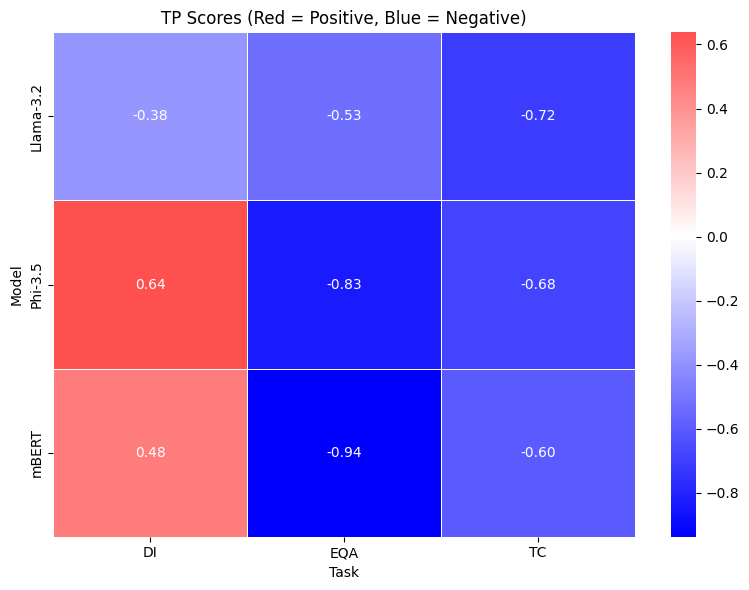

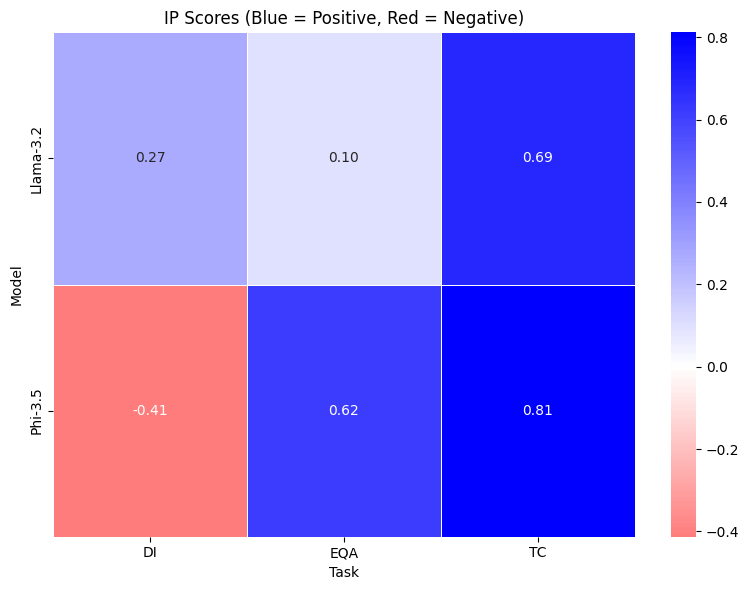

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

# Custom colormaps
cmap_tp = LinearSegmentedColormap.from_list("RedPosBlueNeg", ["blue", "white", "red"])   # TP: pos=red, neg=blue
cmap_ip = LinearSegmentedColormap.from_list("BluePosRedNeg", ["red", "white", "blue"])   # IP: pos=blue, neg=red

# Define the data
data = {
    'Task': [
        'DI', 'DI', 'DI',
        'TC', 'TC', 'TC',
        'EQA', 'EQA', 'EQA'
    ],
    'Model': [
        'Phi-3.5', 'Llama-3.2', 'mBERT',
        'Phi-3.5', 'Llama-3.2', 'mBERT',
        'Phi-3.5', 'Llama-3.2', 'mBERT'
    ],
    'TP': [
        0.638, -0.380, 0.4836,
        -0.683, -0.716, -0.605,
        -0.834, -0.528, -0.938
    ],
    'IP': [
        -0.413, 0.268, None,
        0.812, 0.687, None,
        0.618, 0.097, None
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Pivot tables
tp_pivot = df.pivot(index='Model', columns='Task', values='TP')
ip_pivot = df.pivot(index='Model', columns='Task', values='IP')
ip_pivot = ip_pivot.dropna(how='all')
# TP Plot
plt.figure(figsize=(8, 6))
sns.heatmap(tp_pivot, annot=True, fmt=".2f", cmap=cmap_tp, center=0, linewidths=0.5)
plt.title("TP Scores (Red = Positive, Blue = Negative)")
plt.tight_layout()
plt.show()

# IP Plot
plt.figure(figsize=(8, 6))
sns.heatmap(ip_pivot, annot=True, fmt=".2f", cmap=cmap_ip, center=0, linewidths=0.5)
plt.title("IP Scores (Blue = Positive, Red = Negative)")
plt.tight_layout()
plt.show()


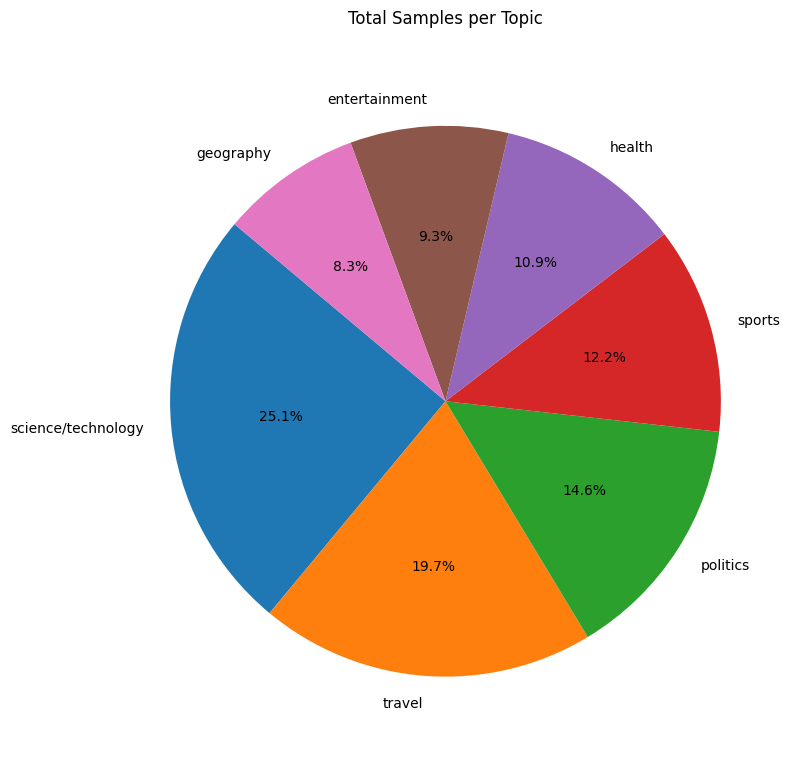

In [ ]:
import matplotlib.pyplot as plt

# Total sample counts per topic
total_labels = {
    'science/technology': 227,
    'travel': 178,
    'politics': 132,
    'sports': 110,
    'health': 99,
    'entertainment': 84,
    'geography': 75
}

# Extract labels and values
labels = list(total_labels.keys())
sizes = list(total_labels.values())

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Total Samples per Topic')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Example: replace with your actual data
data = {
    'Task': ['DI', 'DI', 'DI'],
    'Model': ['Phi-3.5', 'Llama-3.2', 'mBERT'],
    'TP': [0.638, -0.380, 0.4836],
    'IP': [-0.413, 0.268, None],  # None for missing values
}

df = pd.DataFrame(data)

# Dummy performance and TP/IP arrays for significance testing
# Replace these with actual metric arrays (e.g., dialect performance vs. TP/IP)
# Here's how you compute significance for a given pair:
example_tp = [0.6, 0.5, 0.4, 0.7]  # example TP values
example_perf = [0.65, 0.55, 0.45, 0.75]  # example performance scores

# Calculate p-values for each correlation (replace with your own arrays)
tp_corr, tp_pval = pearsonr(example_tp, example_perf)
ip_corr, ip_pval = pearsonr(example_tp, example_perf)  # replace with real IP values

# Only show significant values (p < 0.05)
def format_corr(corr, pval):
    if pd.isna(corr) or pd.isna(pval):
        return "-"
    return f"{corr:.3f}" if pval < 0.05 else "-"

# Apply to dataframe
df['TP_sig'] = df['TP'].apply(lambda x: format_corr(x, tp_pval))
df['IP_sig'] = df['IP'].apply(lambda x: format_corr(x, ip_pval))

print(df[['Task', 'Model', 'TP_sig', 'IP_sig']])


  Task      Model  TP_sig  IP_sig
0   DI    Phi-3.5   0.638  -0.413
1   DI  Llama-3.2  -0.380   0.268
2   DI      mBERT   0.484       -


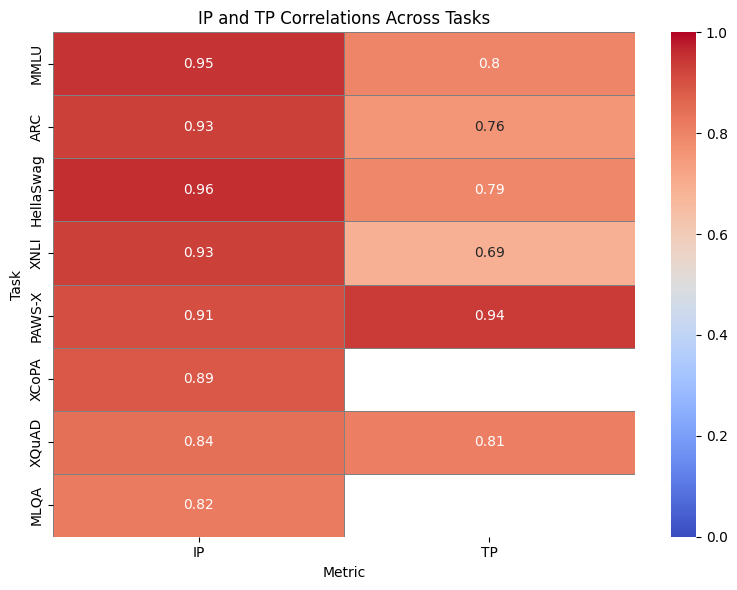

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the data
data = {
    "Task": ["MMLU", "ARC", "HellaSwag", "XNLI", "PAWS-X", "XCoPA", "XQuAD", "MLQA"],
    "IP": [0.95, 0.93, 0.96, 0.93, 0.91, 0.89, 0.84, 0.82],
    "TP": [0.80, 0.76, 0.79, 0.69, 0.94, None, 0.81, None]
}

# Convert to DataFrame
df = pd.DataFrame(data)
df.set_index("Task", inplace=True)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap="coolwarm", vmin=0, vmax=1, linewidths=0.5, linecolor='gray')

# Title and labels
plt.title("IP and TP Correlations Across Tasks")
plt.ylabel("Task")
plt.xlabel("Metric")

plt.tight_layout()
plt.show()


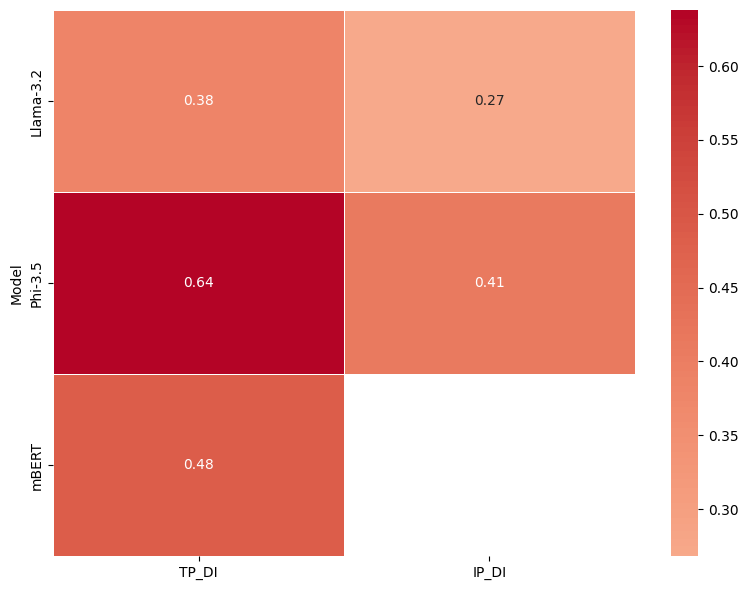

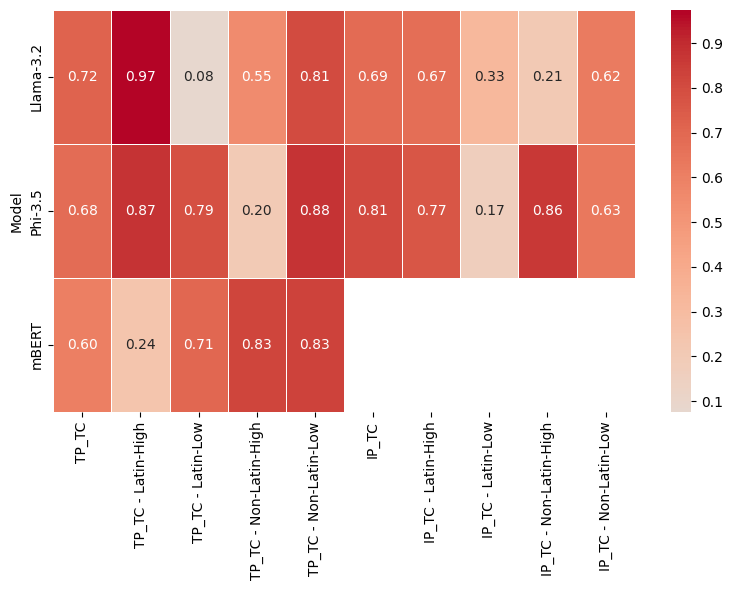

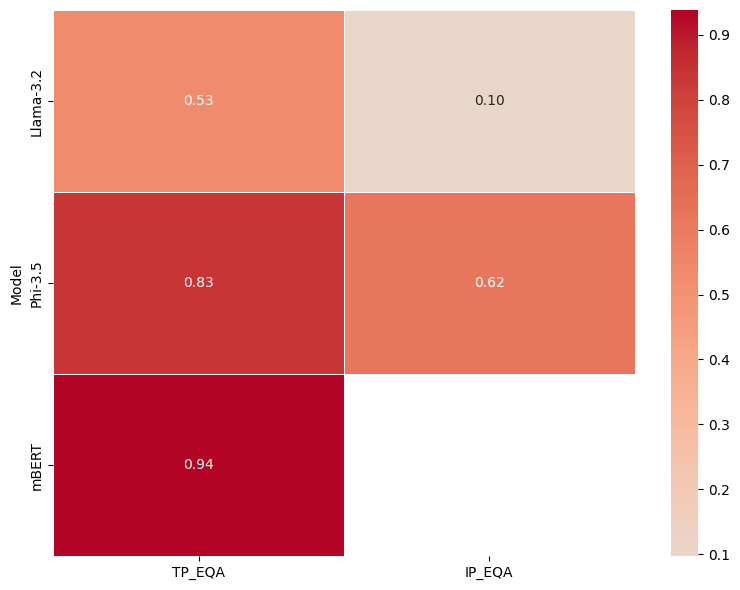

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the data
data = {
    'Task': [
        'DI', 'DI', 'DI',
        'TC', 'TC - Latin-High', 'TC - Latin-Low', 'TC - Non-Latin-High', 'TC - Non-Latin-Low',
        'TC', 'TC - Latin-High', 'TC - Latin-Low', 'TC - Non-Latin-High', 'TC - Non-Latin-Low',
        'TC', 'TC - Latin-High', 'TC - Latin-Low', 'TC - Non-Latin-High', 'TC - Non-Latin-Low',
        'EQA', 'EQA', 'EQA'
    ],
    'Model': [
        'Phi-3.5', 'Llama-3.2', 'mBERT',
        'Phi-3.5', 'Phi-3.5', 'Phi-3.5', 'Phi-3.5', 'Phi-3.5',
        'Llama-3.2', 'Llama-3.2', 'Llama-3.2', 'Llama-3.2', 'Llama-3.2',
        'mBERT', 'mBERT', 'mBERT', 'mBERT', 'mBERT',
        'Phi-3.5', 'Llama-3.2', 'mBERT'
    ],
    'TP': [
        0.638, 0.380, 0.4836,
        0.683, 0.873, 0.785, 0.202, 0.876,
        0.716, 0.974, 0.077, 0.547, 0.805,
        0.605, 0.242, 0.706, 0.826, 0.828,
        0.834, 0.528, 0.938
    ],
    'IP': [
        0.413, 0.268, None,
        0.812, 0.765, 0.165, 0.862, 0.634,
        0.687, 0.671, 0.328, 0.209, 0.623,
        None, None, None, None, None,
        0.618, 0.097, None
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert 'Task' to a short label for plot titles
task_map = {
    'DI': 'Dialect Classification',
    'TC': 'Topic Classification',
    'EQA': 'Extractive QA'
}
df['TaskGroup'] = df['Task'].apply(lambda x: task_map.get(x.split()[0], x.split()[0]))

# Plot heatmaps by task
for task in df['TaskGroup'].unique():
    sub_df = df[df['TaskGroup'] == task].copy()
    pivoted = sub_df.pivot(index='Model', columns='Task', values=['TP', 'IP'])

    # Flatten MultiIndex
    pivoted.columns = [f'{metric}_{cat}' for metric, cat in pivoted.columns]

    plt.figure(figsize=(8, 6))
    sns.heatmap(pivoted, annot=True, fmt=".2f", center=0, cmap='coolwarm', linewidths=0.5)
    #plt.title(f"Correlation Heatmap - {task}")
    plt.tight_layout()
    plt.show()


TypeError: Image data of dtype object cannot be converted to float

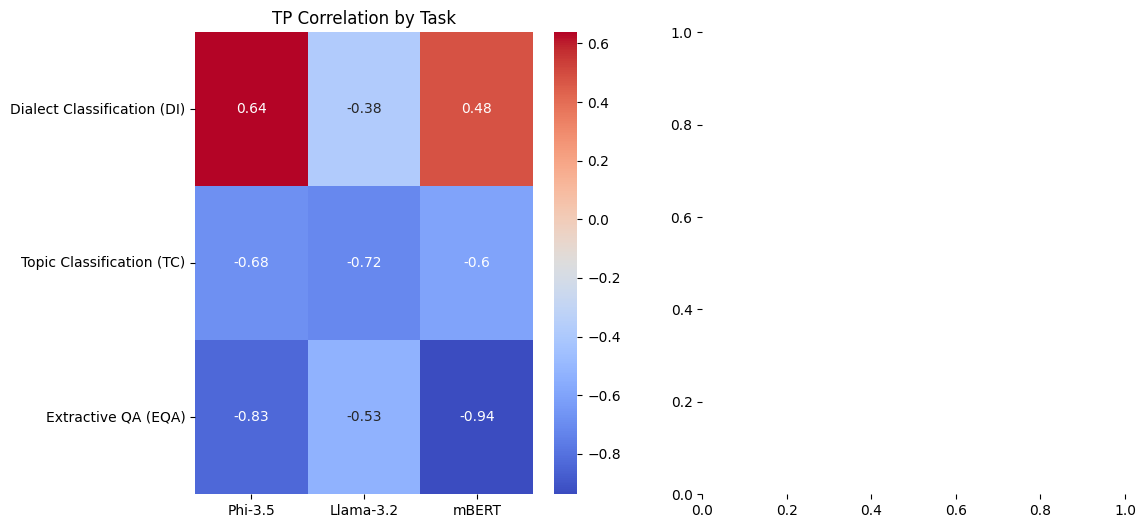

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data for TP and IP correlations for each task
tasks = ['Dialect Classification (DI)', 'Topic Classification (TC)', 'Extractive QA (EQA)']
models = ['Phi-3.5', 'Llama-3.2', 'mBERT']

# Correlation values for TP and IP
TP_corr = np.array([
    [0.638, -0.380, 0.4836],   # DI for Phi-3.5, Llama-3.2, mBERT
    [-0.683, -0.716, -0.605],  # TC for Phi-3.5, Llama-3.2, mBERT
    [-0.834, -0.528, -0.938]   # EQA for Phi-3.5, Llama-3.2, mBERT
])

IP_corr = np.array([
    [-0.413, 0.268, None],    # DI for Phi-3.5, Llama-3.2, mBERT
    [0.812, 0.687, None],     # TC for Phi-3.5, Llama-3.2, mBERT
    [0.618, 0.097, None]      # EQA for Phi-3.5, Llama-3.2, mBERT
])

# Create the figure
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot TP correlation heatmap
sns.heatmap(TP_corr, annot=True, cmap='coolwarm', xticklabels=models, yticklabels=tasks, ax=ax[0], cbar=True)
ax[0].set_title('TP Correlation by Task')

# Plot IP correlation heatmap
sns.heatmap(IP_corr, annot=True, cmap='coolwarm', xticklabels=models, yticklabels=tasks, ax=ax[1], cbar=True)
ax[1].set_title('IP Correlation by Task')

plt.tight_layout()
plt.show()


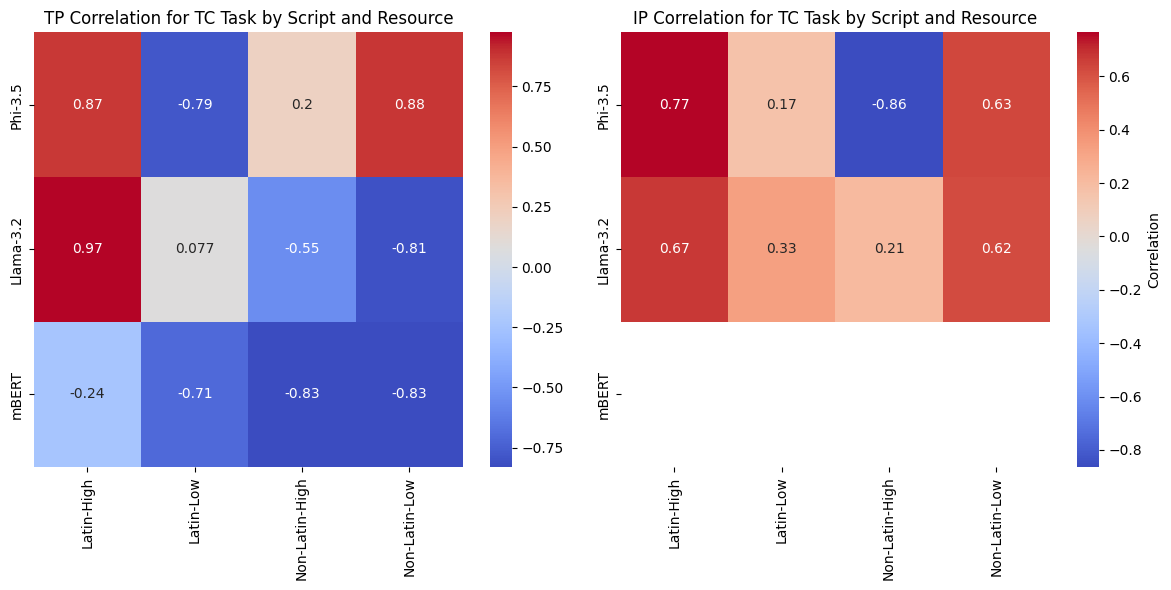

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data for TP and IP correlations for TC task by script and resource type
scripts_resource = ['Latin-High', 'Latin-Low', 'Non-Latin-High', 'Non-Latin-Low']
models = ['Phi-3.5', 'Llama-3.2', 'mBERT']

# TP correlations for TC task
TP_corr = np.array([
    [0.873, -0.785, 0.202, 0.876],  # Phi-3.5: Latin-High, Latin-Low, Non-Latin-High, Non-Latin-Low
    [0.974, 0.077, -0.547, -0.805], # Llama-3.2: Latin-High, Latin-Low, Non-Latin-High, Non-Latin-Low
    [-0.242, -0.706, -0.826, -0.828] # mBERT: Latin-High, Latin-Low, Non-Latin-High, Non-Latin-Low
])

# IP correlations for TC task
IP_corr = np.array([
    [0.765, 0.165, -0.862, 0.634],  # Phi-3.5: Latin-High, Latin-Low, Non-Latin-High, Non-Latin-Low
    [0.671, 0.328, 0.209, 0.623],   # Llama-3.2: Latin-High, Latin-Low, Non-Latin-High, Non-Latin-Low
    [np.nan, np.nan, np.nan, np.nan] # mBERT: No IP values for TC task (we use np.nan)
])

# Create the figure
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot TP correlation heatmap for TC
sns.heatmap(TP_corr, annot=True, cmap='coolwarm', xticklabels=scripts_resource, yticklabels=models, ax=ax[0], cbar=True)
ax[0].set_title('TP Correlation for TC Task by Script and Resource')

# Plot IP correlation heatmap for TC
sns.heatmap(IP_corr, annot=True, cmap='coolwarm', xticklabels=scripts_resource, yticklabels=models, ax=ax[1], cbar=True, cbar_kws={'label': 'Correlation'})
ax[1].set_title('IP Correlation for TC Task by Script and Resource')

plt.tight_layout()
plt.show()


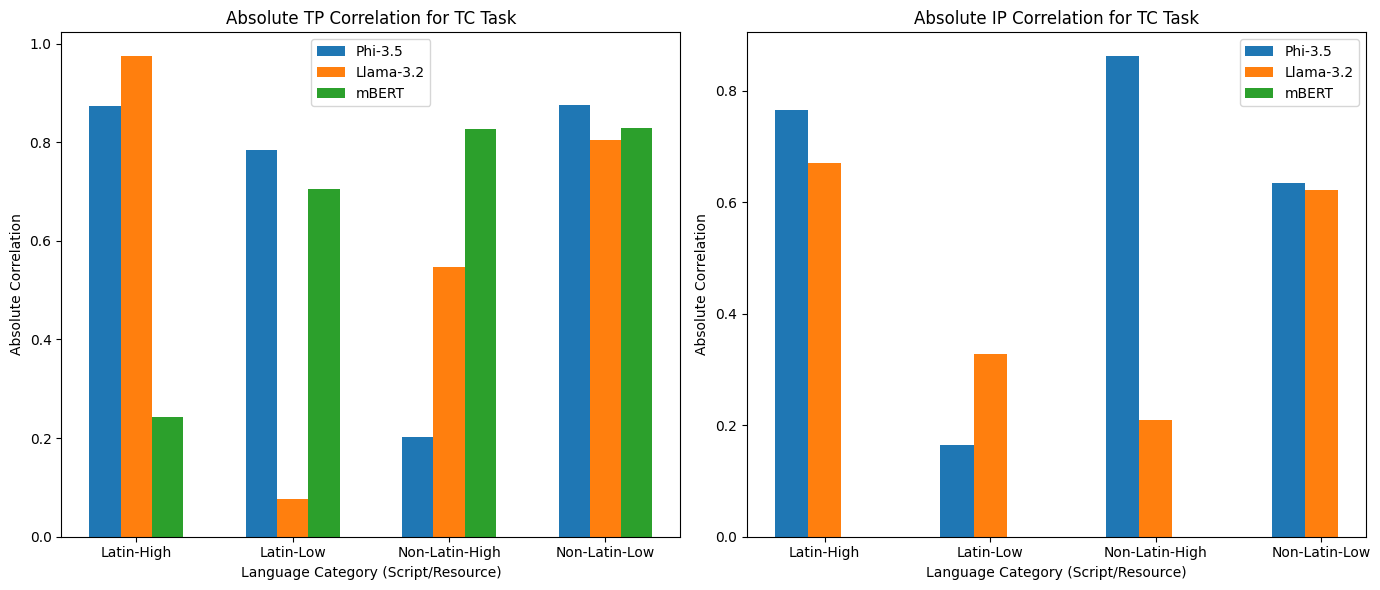

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for TP and IP correlations for TC task by script and resource type
scripts_resource = ['Latin-High', 'Latin-Low', 'Non-Latin-High', 'Non-Latin-Low']
models = ['Phi-3.5', 'Llama-3.2', 'mBERT']

# TP correlations for TC task
TP_corr = np.array([
    [0.873, -0.785, 0.202, 0.876],  # Phi-3.5: Latin-High, Latin-Low, Non-Latin-High, Non-Latin-Low
    [0.974, 0.077, -0.547, -0.805], # Llama-3.2: Latin-High, Latin-Low, Non-Latin-High, Non-Latin-Low
    [-0.242, -0.706, -0.826, -0.828] # mBERT: Latin-High, Latin-Low, Non-Latin-High, Non-Latin-Low
])

# IP correlations for TC task
IP_corr = np.array([
    [0.765, 0.165, -0.862, 0.634],  # Phi-3.5: Latin-High, Latin-Low, Non-Latin-High, Non-Latin-Low
    [0.671, 0.328, 0.209, 0.623],   # Llama-3.2: Latin-High, Latin-Low, Non-Latin-High, Non-Latin-Low
    [np.nan, np.nan, np.nan, np.nan] # mBERT: No IP values for TC task (we use np.nan)
])

# Take absolute values of the correlations for a clear comparison
TP_corr_abs = np.abs(TP_corr)
IP_corr_abs = np.abs(IP_corr)

# Set up the plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for TP correlations (absolute values)
width = 0.2  # Width of the bars
x = np.arange(len(scripts_resource))  # Position of bars

for i, model in enumerate(models):
    ax[0].bar(x + (i - 1) * width, TP_corr_abs[i], width=width, label=model)

ax[0].set_xticks(x)
ax[0].set_xticklabels(scripts_resource)
ax[0].set_xlabel('Language Category (Script/Resource)')
ax[0].set_ylabel('Absolute Correlation')
ax[0].set_title('Absolute TP Correlation for TC Task')
ax[0].legend()

# Bar plot for IP correlations (absolute values)
for i, model in enumerate(models):
    ax[1].bar(x + (i - 1) * width, IP_corr_abs[i], width=width, label=model)

ax[1].set_xticks(x)
ax[1].set_xticklabels(scripts_resource)
ax[1].set_xlabel('Language Category (Script/Resource)')
ax[1].set_ylabel('Absolute Correlation')
ax[1].set_title('Absolute IP Correlation for TC Task')
ax[1].legend()

# Adjust layout and display
plt.tight_layout()
plt.show()


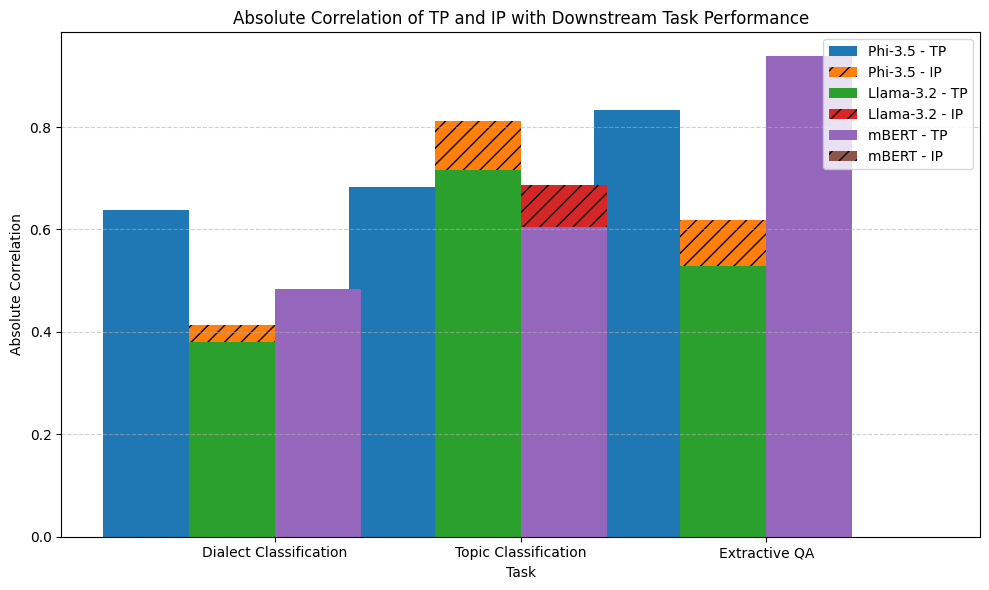

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Tasks and models
tasks = ['Dialect Classification', 'Topic Classification', 'Extractive QA']
models = ['Phi-3.5', 'Llama-3.2', 'mBERT']

# Absolute correlation values (example based on your data)
correlations = {
    'TP': [
        [0.638, 0.380, 0.4836],  # DI
        [0.683, 0.716, 0.605],   # TC
        [0.834, 0.528, 0.938]    # EQA
    ],
    'IP': [
        [0.413, 0.268, 0],       # DI
        [0.812, 0.687, 0],       # TC
        [0.618, 0.097, 0]        # EQA
    ]
}

# Convert to numpy arrays
tp_vals = np.array(correlations['TP'])
ip_vals = np.array(correlations['IP'])

# Plot settings
bar_width = 0.35
x = np.arange(len(tasks))

fig, ax = plt.subplots(figsize=(10, 6))

for i, model in enumerate(models):
    ax.bar(x + i*bar_width - bar_width, tp_vals[:, i], width=bar_width, label=f'{model} - TP')
    ax.bar(x + i*bar_width, ip_vals[:, i], width=bar_width, label=f'{model} - IP', hatch='//')

# Axis and title
ax.set_xlabel('Task')
ax.set_ylabel('Absolute Correlation')
ax.set_title('Absolute Correlation of TP and IP with Downstream Task Performance')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(tasks)
ax.legend(loc='upper right')
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


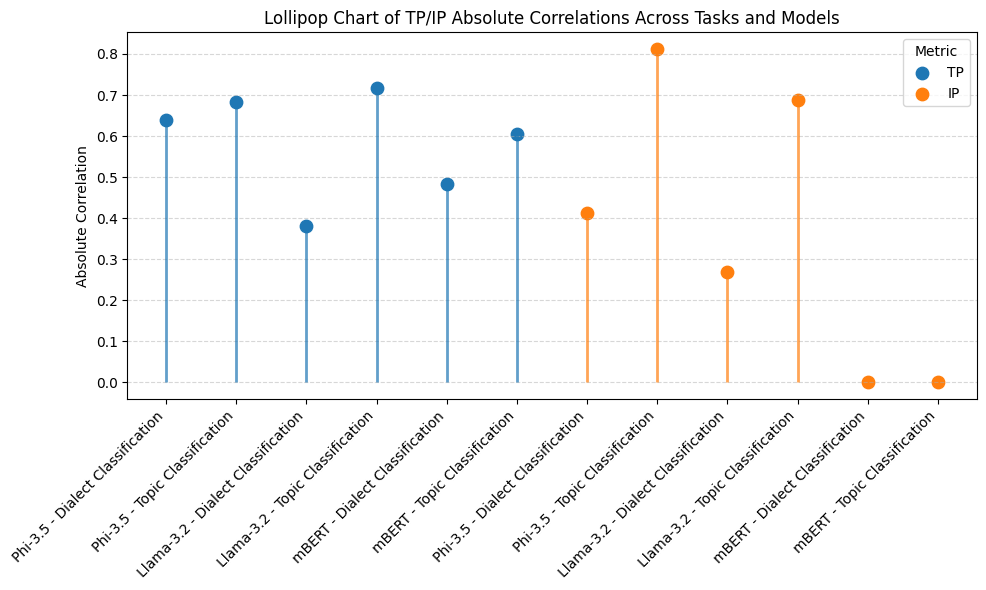

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data (absolute correlation values)
data = {
    'Model': ['Phi-3.5', 'Phi-3.5', 'Llama-3.2', 'Llama-3.2', 'mBERT', 'mBERT'],
    'Task': ['Dialect Classification', 'Topic Classification'] * 3,
    'TP': [0.638, 0.683, 0.380, 0.716, 0.4836, 0.605],
    'IP': [0.413, 0.812, 0.268, 0.687, 0.0, 0.0]  # Assuming IP missing for mBERT
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert to long format for easier plotting
df_long = df.melt(id_vars=['Model', 'Task'], value_vars=['TP', 'IP'], var_name='Metric', value_name='Correlation')
df_long['Correlation'] = df_long['Correlation'].abs()

# Plot
plt.figure(figsize=(10, 6))

# Create unique label per point
df_long['Label'] = df_long['Model'] + ' - ' + df_long['Task']

# Assign numeric x-axis
x_labels = df_long['Label'].unique()
x = np.arange(len(x_labels))

for metric, color in zip(['TP', 'IP'], ['#1f77b4', '#ff7f0e']):
    subset = df_long[df_long['Metric'] == metric]
    plt.vlines(x=subset.index, ymin=0, ymax=subset['Correlation'], color=color, alpha=0.7, linewidth=2)
    plt.scatter(subset.index, subset['Correlation'], color=color, s=80, label=metric)

# Aesthetic
plt.xticks(ticks=df_long.index, labels=df_long['Label'], rotation=45, ha='right')
plt.ylabel('Absolute Correlation')
plt.title('Lollipop Chart of TP/IP Absolute Correlations Across Tasks and Models')
plt.legend(title='Metric')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


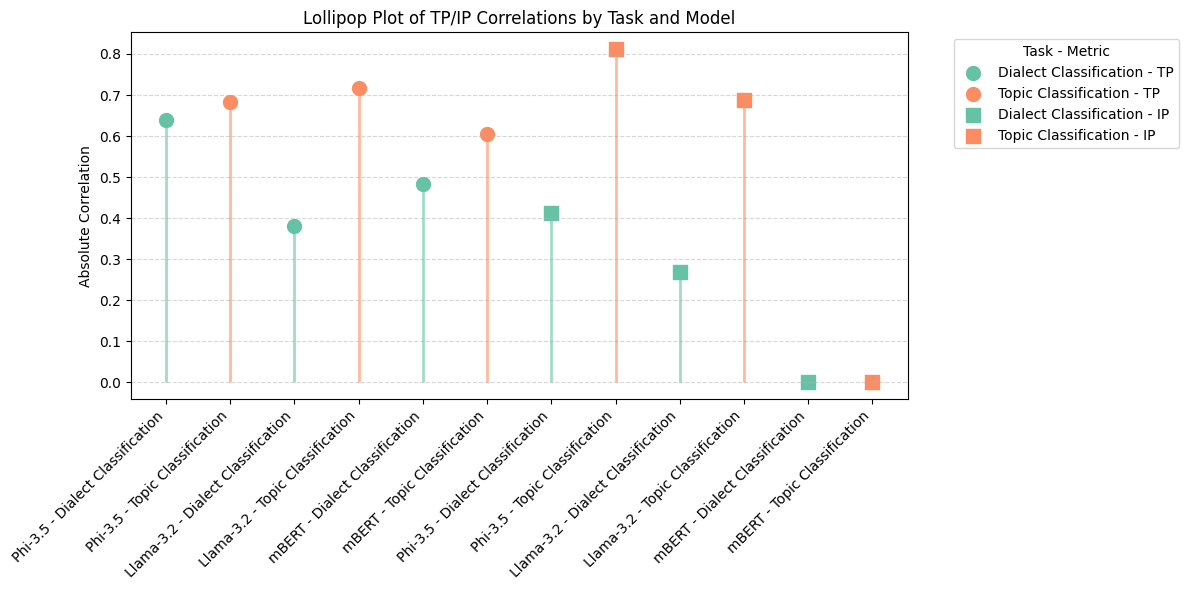

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Sample data (absolute correlation values)
data = {
    'Model': ['Phi-3.5', 'Phi-3.5', 'Llama-3.2', 'Llama-3.2', 'mBERT', 'mBERT'],
    'Task': ['Dialect Classification', 'Topic Classification'] * 3,
    'TP': [0.638, 0.683, 0.380, 0.716, 0.4836, 0.605],
    'IP': [0.413, 0.812, 0.268, 0.687, 0.0, 0.0]  # Assuming missing IP for mBERT
}

df = pd.DataFrame(data)
df_long = df.melt(id_vars=['Model', 'Task'], value_vars=['TP', 'IP'], var_name='Metric', value_name='Correlation')
df_long['Correlation'] = df_long['Correlation'].abs()
df_long['Label'] = df_long['Model'] + ' - ' + df_long['Task']

# Assign colors by Task
task_palette = dict(zip(df_long['Task'].unique(), sns.color_palette('Set2', n_colors=len(df_long['Task'].unique()))))
markers = {'TP': 'o', 'IP': 's'}

plt.figure(figsize=(12, 6))
for idx, row in df_long.iterrows():
    plt.vlines(x=idx, ymin=0, ymax=row['Correlation'], color=task_palette[row['Task']], alpha=0.6, linewidth=2)
    plt.scatter(idx, row['Correlation'],
                color=task_palette[row['Task']],
                s=100, marker=markers[row['Metric']],
                label=f"{row['Task']} - {row['Metric']}")

# Unique labels only in legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Task - Metric", bbox_to_anchor=(1.05, 1), loc='upper left')

# Aesthetic
plt.xticks(ticks=range(len(df_long)), labels=df_long['Label'], rotation=45, ha='right')
plt.ylabel('Absolute Correlation')
plt.title('Lollipop Plot of TP/IP Correlations by Task and Model')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


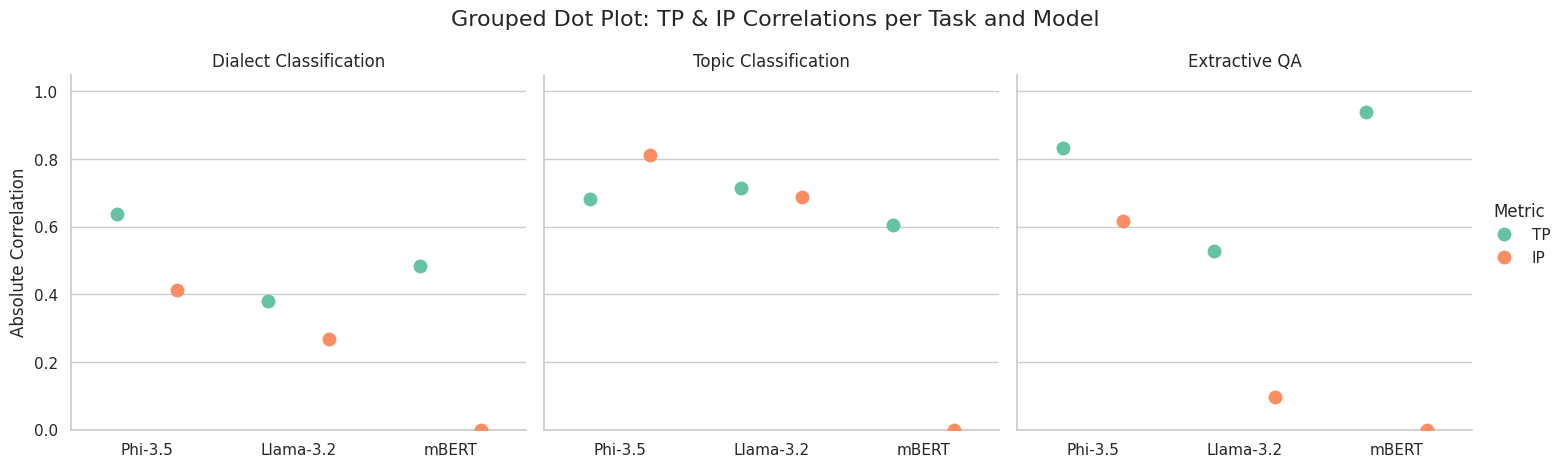

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data input: absolute correlation values for TP and IP
data = {
    "Model": [
        "Phi-3.5", "Phi-3.5", "Llama-3.2", "Llama-3.2", "mBERT", "mBERT",  # DI
        "Phi-3.5", "Phi-3.5", "Llama-3.2", "Llama-3.2", "mBERT", "mBERT",  # TC
        "Phi-3.5", "Phi-3.5", "Llama-3.2", "Llama-3.2", "mBERT", "mBERT"   # EQA
    ],
    "Task": [
        "Dialect Classification", "Dialect Classification", "Dialect Classification", "Dialect Classification", "Dialect Classification", "Dialect Classification",
        "Topic Classification", "Topic Classification", "Topic Classification", "Topic Classification", "Topic Classification", "Topic Classification",
        "Extractive QA", "Extractive QA", "Extractive QA", "Extractive QA", "Extractive QA", "Extractive QA"
    ],
    "Metric": [
        "TP", "IP", "TP", "IP", "TP", "IP",
        "TP", "IP", "TP", "IP", "TP", "IP",
        "TP", "IP", "TP", "IP", "TP", "IP"
    ],
    "Correlation": [
        0.638, 0.413, 0.380, 0.268, 0.4836, 0.0,  # DI
        0.683, 0.812, 0.716, 0.687, 0.605, 0.0,   # TC
        0.834, 0.618, 0.528, 0.097, 0.938, 0.0    # EQA
    ]
}

df = pd.DataFrame(data)

# Plot
sns.set(style="whitegrid")
g = sns.catplot(
    data=df, x="Model", y="Correlation", hue="Metric", col="Task",
    kind="strip", dodge=True, jitter=False, size=10, palette="Set2",
    height=5, aspect=1
)

# Customization
g.set_titles("{col_name}")
g.set_axis_labels("", "Absolute Correlation")
g.set(ylim=(0, 1.05))
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Grouped Dot Plot: TP & IP Correlations per Task and Model", fontsize=16)
plt.show()
